Library Calling

In [1]:
import numpy as np
import pandas as pd
import math
import random
import copy
import itertools
from itertools import product


import matplotlib.pyplot as plt

import datetime
from datetime import timedelta

import gym
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy


import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import torch.nn.functional as F


Function of Return Decision Epoch

In [2]:
def adjustment_function(x, C, charge, action, gamma, delta):
    if charge <= 0:
        raise ValueError("Charge level s_i must be positive")
    if charge > C:
        raise ValueError("Charge level s_i cannot exceed the maximum charge C")


    adjustment = (C / charge) * (1 + gamma * np.power((C - charge) / C, delta))*((x+1)*(action)/C)

    return adjustment


######################################################################################
x = 5
charge = 1
C = 3
gamma = 0.5
delta = 0.5
action = -1


f_s_i = adjustment_function(x, C, charge, action, gamma, delta)
print(
    f"time required for satisfying the demand with charge level of {charge}: {math.ceil(f_s_i)}")

time required for satisfying the demand with charge level of 1: -8


Plot of Return Decision Epoch

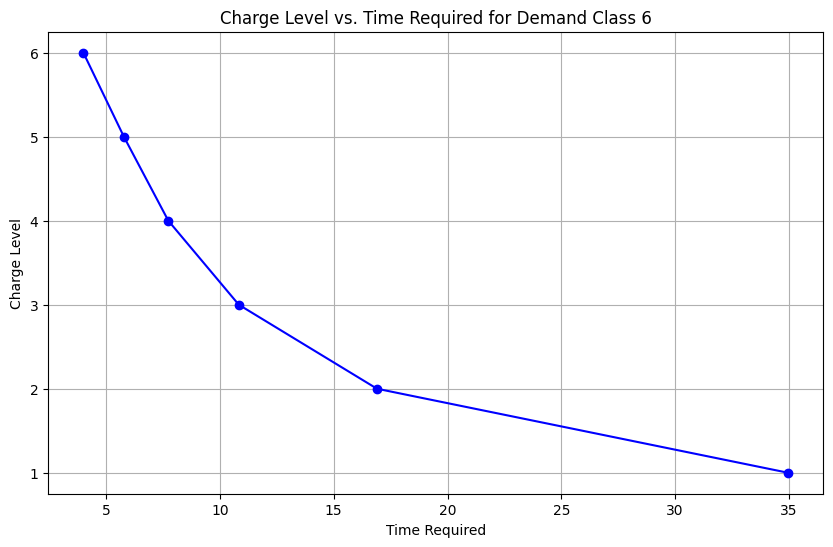

In [3]:
def adjustment_function(s_i, C, gamma, delta):
    if s_i <= 0:
        raise ValueError("Charge level s_i must be positive")
    if s_i > C:
        raise ValueError("Charge level s_i cannot exceed the maximum charge C")

    fraction = (C - s_i) / C

    adjustment = (C / s_i) * (1 + gamma * np.power(fraction, delta))

    return adjustment


################################################################################################
x = 3
C = 6
gamma = 0.5
delta = 0.5
demand_class = 6

charge_levels = np.arange(1, C + 1)
time_required = []


for s_i in charge_levels:
    adjustment_factor = adjustment_function(s_i, C, gamma, delta)
    time = adjustment_factor * ((x + 1) * demand_class / C)
    time_required.append(time)

plt.figure(figsize=(10, 6))
plt.plot(time_required, charge_levels, marker='o', linestyle='-', color='b')
plt.ylabel('Charge Level')
plt.xlabel('Time Required')
plt.title('Charge Level vs. Time Required for Demand Class {}'.format(demand_class))
plt.grid(True)
plt.show()

In [19]:
# def update_q_table(Q, state, action, reward, new_state, alpha, discount_factor, num_drones, C):
#     """
#     Update the Q-value for a given state-action pair.
    
#     Args:
#         Q (dict): Q-table.
#         state (list): The current state.
#         action (int): The action taken.
#         reward (float): The reward received.
#         new_state (list): The new state after the action.
#         alpha (float): Learning rate.
#         gamma (float): Discount factor.
#         num_drones (int): Number of drones.
#         C (int): Maximum charge level.
#     """
#     state_index = get_state_index(state, num_drones, C)
#     new_state_index = get_state_index(new_state, num_drones, C)
    
#     # Calculate the target Q-value
#     max_future_q = np.max(Q[new_state_index])
#     target_q = reward + discount_factor * max_future_q
    
#     # Update the Q-value
#     Q[state_index, action] += alpha * (target_q - Q[state_index, action])

In [20]:
# def train_model(num_episodes, num_drones, C, max_action, x, delta, demands):
#     """
#     Train the Q-learning model.
    
#     Args:
#         num_episodes (int): Number of episodes to train.
#         num_drones (int): Number of drones.
#         C (int): Maximum charge level.
#         max_action (int): Maximum action value.
#         x (int): Maximum time for the furthest delivery mission.
#         delta (float): Parameter in the state transition equation.
#         demands (dict): Dictionary with demand for each class.
#     """
#     Q = initialize_q_table(num_drones, C, max_action)
    
#     for _ in range(num_episodes):
#         state = initialize_state(num_drones, C)
#         done = False
        
#         while not done:
#             feasible_actions = [get_feasible_actions(d[0], C) for d in state]
#             actions = [choose_action(s, feasible_actions[i], epsilon, Q, num_drones, C) for i, s in enumerate(state)]
            
#             new_states = state_transition(state, actions, num_drones, C, x, gamma, delta)
#             reward = calculate_reward(demands, new_states)
            
#             for i, s in enumerate(state):
#                 update_q_table(Q, s, actions[i], reward, new_states[i], alpha, gamma, num_drones, C)
            
#             state = new_states
#             done = check_done(state)

In [1]:
# def calculate_demand_summary_and_reward1(demands, states, actions, capacity):
#     # Initialize demand fulfillment tracking
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}

#     # Track remaining demands
#     remaining_demands = demands.copy()

#     # Iterate over drones and their actions
#     for i, (charge, final_charge) in enumerate(states):
#         action = actions[i]

#         if charge >= 0:  # Drone is at the station
#             if action > 0:  # Charging action
#                 continue
#             elif action < 0:  # Allocation action
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     # Calculate how much demand can be fulfilled
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled

#     # Calculate unsatisfied demands, reward, and penalty
#     reward = 0
#     penalty = 0

#     for demand_class in remaining_demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - \
#             demand_fulfilled[demand_class]
#         # Calculate reward based on the number of satisfied demands
#         reward += demand_class * demand_fulfilled[demand_class]
#         # Calculate penalty based on unmet demand
#         penalty += demand_class * demand_unsatisfied[demand_class]

#     # Final reward: Encourage meeting demand and discourage unmet demand
#     final_reward = reward - penalty

#     return demand_fulfilled, demand_unsatisfied, final_reward


In [2]:
# def calculate_demand_summary_and_reward2(demands, states, actions, capacity, charge_penalty_weight=1, mission_reward_weight=1):
#     # Initialize demand fulfillment tracking
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}

#     # Track remaining demands
#     remaining_demands = demands.copy()

#     # Initialize reward and penalty
#     reward = 0
#     penalty = 0

#     # Iterate over drones and their actions
#     for i, (charge, final_charge) in enumerate(states):
#         action = actions[i]

#         if charge >= 0:  # Drone is at the station
#             if action > 0:  # Charging action
#                 # Penalize the reward for using energy to charge the drone
#                 penalty += charge_penalty_weight * action
#             elif action < 0:  # Allocation action
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     # Calculate how much demand can be fulfilled
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     # Reward for sending the drone to meet demand
#                     reward += mission_reward_weight * demand_class

#     # Calculate unsatisfied demands, additional reward, and penalty
#     for demand_class in remaining_demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
#         # Calculate reward based on the number of satisfied demands
#         reward += demand_class * demand_fulfilled[demand_class]
#         # Calculate penalty based on unmet demand
#         penalty += demand_class * demand_unsatisfied[demand_class]

#     # Final reward: Encourage meeting demand, discourage unmet demand, and account for charging/missions
#     final_reward = reward - penalty

#     return demand_fulfilled, demand_unsatisfied, final_reward


In [3]:
# # Define your demand, states, and actions
# states = [(6, 0), (6, 0), (6, 0), (6, 0)]  # Updated states after actions
# actions = [-3, -2, -2, 1]  # Corresponding actions: charge drone 1, assign drone 2 to class 2, assign drone 3 to class 2, no action for drone 4
# demands = {1: 4, 2: 3, 3: 4}  # Initial demands
# capacity = 2  # Drone capacity

# # Calculate the reward
# demand_fulfilled, demand_unsatisfied, final_reward = calculate_demand_summary_and_reward2(demands, states, actions, capacity)

# # Output the results
# print("Demand Fulfilled:", demand_fulfilled)
# print("Demand Unsatisfied:", demand_unsatisfied)
# print("Final Reward:", final_reward)


In [25]:
# # Example usage
# states = [(6, 0), (6, 0), (6, 0), (6, 0)]  # Updated states after actions
# actions = [-3, -3, -1, 1]  # Corresponding actions: charge drone 1, assign drone 2 to class 2, assign drone 3 to class 2, no action for drone 4
# demands = {1: 4, 2: 4, 3: 4}  # Initial demands
# capacity = 2  # Drone capacity

# demand_fulfilled, demand_unsatisfied, final_reward = calculate_demand_summary_and_reward1(demands, states, actions, capacity)

# # Print the results
# for demand_class in demands:
#     print(f"Demand Class {demand_class}:")
#     print(f"  Total Satisfied Demand: {demand_fulfilled[demand_class]}")
#     print(f"  Total Unsatisfied Demand: {demand_unsatisfied[demand_class]}")

# print(f"\nTotal Reward: {final_reward}")

In [26]:
# def calculate_demand_summary_and_reward(demands, states, actions, capacity):
#     # Initialize demand fulfillment tracking
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}

#     # Track remaining demands
#     remaining_demands = demands.copy()

#     # Iterate over drones and their actions
#     for i, (charge, final_charge) in enumerate(states):
#         action = actions[i]

#         if charge >= 0:  # Drone is at the station
#             if action > 0:  # Charging action
#                 continue
#             elif action < 0:  # Allocation action
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     # Calculate how much demand can be fulfilled
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled

#     # Calculate unsatisfied demands and reward
#     reward = 0
#     for demand_class in remaining_demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - \
#             demand_fulfilled[demand_class]
#         # Calculate reward based on the number of satisfied demands
#         reward += demand_class * demand_fulfilled[demand_class]

#     return demand_fulfilled, demand_unsatisfied, reward


In [27]:
# # Example usage
# states = [(6, 0), (6, 0), (6, 0), (6, 0)]  # Updated states after actions
# actions = [-3, -3, -1, 1]  # Corresponding actions: charge drone 1, assign drone 2 to class 2, assign drone 3 to class 2, no action for drone 4
# demands = {1: 4, 2: 4, 3: 4}  # Initial demands
# capacity = 2  # Drone capacity

# demand_fulfilled, demand_unsatisfied, reward = calculate_demand_summary_and_reward(demands, states, actions, capacity)

# # Print the results
# for demand_class in demands:
#     print(f"Demand Class {demand_class}:")
#     print(f"  Total Satisfied Demand: {demand_fulfilled[demand_class]}")
#     print(f"  Total Unsatisfied Demand: {demand_unsatisfied[demand_class]}")

# print(f"\nTotal Reward: {reward}")

In [28]:
# def generate_demand(lambdas_by_period, time_index):

#     lambdas = lambdas_by_period.get(time_index, [])
#     return {i + 1: np.random.poisson(lambdas[i]) for i in range(len(lambdas))}


In [29]:
# def generate_demand(lambdas):
#     return {i + 1: np.random.poisson(lambdas[i]) for i in range(len(lambdas))}

In [30]:
# def generate_demand(lambdas, C):
#     if len(lambdas) != C:
#         raise ValueError(
#             "The length of lambdas must match the number of demand classes.")

#     # Generate Poisson-distributed demand for each class
#     demand = {i+1: np.random.poisson(lam=lambdas[i])
#               for i in range(C)}

#     return demand

In [31]:
# import numpy as np

# def initialize_q_table(num_drones, C, x, T):
#     state_size_per_drone = (C + 1) * (x + 1) * T
    
#     total_states = state_size_per_drone ** num_drones
    
#     action_size_per_drone = 2 * C + 1
    
#     total_actions = action_size_per_drone ** num_drones
    
#     Q_table = np.zeros((total_states, total_actions))
    
#     return Q_table

# # # Example usage
# # num_drones = 4  # Number of drones
# # C = 3           # Maximum charge level
# # x = 2           # Maximum epochs for mission return
# # T = 24          # Total time periods

# # Q_table = initialize_q_table(num_drones, C, x, T)
# # print("Q-table shape:", Q_table.shape)


In [32]:
# def initialize_state(num_drones, C, x, T):

#     drones_states = [(C, 0) for _ in range(num_drones)]
    
#     time_index = 1
    
#     state = (drones_states, time_index)
    
#     return state


In [33]:
# def state_transition(states, actions, num_drones, C, x, gamma, delta):

#     drones_states, time_index = states  # Unpack current state
    
#     new_drones_states = []
#     for i in range(num_drones):
#         charge, final_charge = drones_states[i]
#         action = actions[i]

#         if charge >= 0 and action >= 0:
#             # Charging action
#             new_charge = min(charge + action, C)
#         elif charge >= 0 and action < 0:
#             # Allocation action: sending the drone out for delivery
#             new_charge = - math.ceil((C / charge) * (1 + gamma * np.power(
#                 (C - charge) / C, delta))*((x+1)*(abs(action))/C))
#         elif charge < 0 and charge != -1:
#             # Drone is out for delivery and not returning yet
#             new_charge = charge + 1
#         else:
#             # Drone has returned or no action
#             new_charge = final_charge

#         # Final charge remains the same unless there was a charging or delivery action
#         if charge >= 0 and action > 0:
#             final_charge = new_charge
#         elif charge >= 0 and action < 0:
#             final_charge = charge + action
#         elif charge >= 0 and action == 0:
#             final_charge = charge
#         elif charge < 0 and action == 0:
#             final_charge = final_charge
    
        
#         # Append the updated drone state
#         new_drones_states.append((new_charge, final_charge))
    
#     # Update the time index (move to the next period)
#     new_time_index = (time_index % T) + 1
    
#     # Return the new state
#     new_state = (new_drones_states, new_time_index)
    
#     return new_state

# # # Example usage
# # num_drones = 4  
# # C = 3           
# # x = 2         
# # T = 24         
# # gamma = 0.9
# # delta = 0.5

# # # Example state and actions
# # current_state = ([ (2, 3), (3, 1), (-1, 0), (0, 0)], 1)
# # actions = [1, -2, 0, 0]

# # # Get the new state
# # new_state = state_transition(current_state, actions, num_drones, C, x, gamma, delta)
# # print("New state:", new_state)


In [34]:
# def calculate_demand_summary_and_reward(demands, states, actions, capacity, charge_penalty_weight=1, mission_reward_weight=1):
#     """
#     Calculate demand fulfillment, unmet demands, and the reward based on current state, actions, and demands.
    
#     Args:
#         demands (dict): Current period's demand for each class (e.g., {1: 4, 2: 3, 3: 5}).
#         states (tuple): Current states of the drones and the time index.
#         actions (list): Actions taken by each drone.
#         capacity (int): Maximum capacity of each drone.
#         charge_penalty_weight (float): Penalty weight for charging actions.
#         mission_reward_weight (float): Reward weight for successfully fulfilling demands.

#     Returns:
#         tuple: Demand fulfillment summary, unmet demands, and final reward.
#     """
#     drones_states, _ = states  # Extract drone states (ignore time index here)
    
#     # Initialize demand fulfillment tracking
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}

#     # Track remaining demands
#     remaining_demands = demands.copy()
    
#     # Initialize reward and penalty
#     reward = 0
#     penalty = 0
    
#     # Iterate over drones and their actions
#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
        
#         if charge >= 0:  # Drone is at the station
#             if action > 0:  # Charging action
#                 # Penalize the reward for using energy to charge the drone
#                 penalty += charge_penalty_weight * action
#             elif action < 0:  # Allocation action
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     # Calculate how much demand can be fulfilled
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     # Reward for sending the drone to meet demand
#                     reward += mission_reward_weight * demand_class

#     # Calculate unsatisfied demands and final reward
#     for demand_class in demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
#         # Calculate reward based on the number of satisfied demands
#         reward += demand_class * demand_fulfilled[demand_class]
#         # Calculate penalty based on unmet demand
#         penalty += demand_class * demand_unsatisfied[demand_class]
    
#     # Final reward: Encourage meeting demand, discourage unmet demand, and account for charging/missions
#     final_reward = reward - penalty
    
#     return demand_fulfilled, demand_unsatisfied, final_reward


# # Example usage
# demands = {1: 4, 2: 3, 3: 5}  # Example demands for current period
# states = ([ (2, 3), (1, 1), (-1, 0), (0, 0)], 5)  # Example state with 5 as current time index
# actions = [1, -2, 0, 0]  # Example actions
# capacity = 3  # Maximum capacity

# # Get demand summary and reward
# demand_fulfilled, demand_unsatisfied, reward = calculate_demand_summary_and_reward(demands, states, actions, capacity)
# print("Demand Fulfilled:", demand_fulfilled)
# print("Demand Unsatisfied:", demand_unsatisfied)
# print("Reward:", reward)


In [35]:
# # Example usage
# capacity = 2
# lambdas = [2, 3, 4]
# gamma = 0.5 
# delta = 0.5
# num_drones = 4
# C = 6
# x = 8
# T = 24
# lambdas = [5, 3, 2]


# # Function definitions (as reviewed and refined)
# def initialize_q_table(num_drones, C, x, T):
#     state_size_per_drone = (C + 1 + x) * T
#     total_states = state_size_per_drone ** num_drones
#     action_size_per_drone = 2 * C + 1
#     total_actions = action_size_per_drone ** num_drones
#     Q_table = np.zeros((total_states, total_actions))
#     return Q_table

# def initialize_state(num_drones, C, x, T):
#     drones_states = [(C, 0) for _ in range(num_drones)]
#     time_index = 1
#     state = (drones_states, time_index)
#     return state

# def state_transition(states, actions, num_drones, C, x, gamma, delta):
#     drones_states, time_index = states
#     new_drones_states = []
    
#     for i in range(num_drones):
#         charge, final_charge = drones_states[i]
#         action = actions[i]

#         if charge >= 0 and action >= 0:
#             new_charge = min(charge + action, C)
#         elif charge >= 0 and action < 0:
#             new_charge = -math.ceil((C / charge) * (1 + gamma * np.power(
#                 (C - charge) / C, delta)) * ((x + 1) * (abs(action)) / C))
#         elif charge < 0 and charge != -1:
#             new_charge = charge + 1
#         else:
#             new_charge = final_charge
        
#         if charge >= 0 and action > 0:
#             final_charge = new_charge
#         elif charge >= 0 and action < 0:
#             final_charge = charge + action
#         elif charge >= 0 and action == 0:
#             final_charge = charge
#         elif charge < 0 and action == 0:
#             final_charge = final_charge
        
#         new_drones_states.append((new_charge, final_charge))
    
#     new_time_index = (time_index % T) + 1
#     new_state = (new_drones_states, new_time_index)
    
#     return new_state

# def get_feasible_actions(charge, C):
#     feasible_actions = [0]
#     if charge >= 0:
#         if charge < C:
#             feasible_actions.append(1)
#         for j in range(1, charge + 1):
#             feasible_actions.append(-j)
#     return feasible_actions

# def generate_demand(lambdas):
#     return {i + 1: np.random.poisson(lambdas[i]) for i in range(len(lambdas))}

# def calculate_demand_summary_and_reward(demands, states, actions, capacity, charge_penalty_weight=1, mission_reward_weight=1):
#     drones_states, _ = states
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}
#     remaining_demands = demands.copy()
    
#     reward = 0
#     penalty = 0
    
#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0:
#             if action > 0:
#                 penalty += charge_penalty_weight * action
#             elif action < 0:
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     reward += mission_reward_weight * demand_class

#     for demand_class in demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
#         reward += demand_class * demand_fulfilled[demand_class]
#         penalty += demand_class * demand_unsatisfied[demand_class]
    
#     final_reward = reward - penalty
    
#     return demand_fulfilled, demand_unsatisfied, final_reward


# # Helper functions to convert state and action to indices
# def state_to_index(state, num_drones, C, x, T):
#     drones_states, time_index = state
#     state_index = 0
#     multiplier = 1
    
#     for (charge, _) in drones_states:
#         state_index += (charge + C) * multiplier
#         multiplier *= (C + 1 + x)
    
#     state_index += (time_index - 1) * multiplier
#     return state_index

# def action_to_index(actions, num_drones, num_actions):
#     action_index = 0
#     multiplier = 1
    
#     for action in actions:
#         action_index += (action + num_actions // 2) * multiplier
#         multiplier *= num_actions
    
#     return action_index

# # Q-learning algorithm
# def q_learning(num_drones, C, x, T, lambdas, alpha=0.1, DF=0.9, epsilon=0.1, num_episodes=1000):
#     Q_table = initialize_q_table(num_drones, C, x, T)
    
#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C, x, T)
#         total_reward = 0
        
#         while True:
#             # Generate demand for the current time period
#             demands = generate_demand(lambdas)
            
#             # Choose an action based on epsilon-greedy policy
#             feasible_actions = []
#             for i in range(num_drones):
#                 charge, _ = state[0][i]
#                 feasible_actions.append(get_feasible_actions(charge, C))
            
#             action_indices = [random.choice(feasible) for feasible in feasible_actions]
#             actions = [random.choice(feasible) for feasible in feasible_actions]
            
#             # Transition to the new state
#             new_state = state_transition(state, actions, num_drones, C, x, gamma, delta)
            
#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(demands, state, actions, capacity)
#             total_reward += reward
            
#             # Update Q-table
#             state_index = state_to_index(state, num_drones, C, x, T)
#             new_state_index = state_to_index(new_state, num_drones, C, x, T)
#             action_index = action_to_index(actions, num_drones, 2 * C + 1)
            
#             best_future_q = np.max(Q_table[new_state_index])
#             Q_table[state_index, action_index] += alpha * (reward + DF * best_future_q - Q_table[state_index, action_index])
            
#             state = new_state
            
#             if state[1] == 1:  # End of episode if time index is back to 1
#                 break
        
#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")

#     return Q_table

# Q_table = q_learning(num_drones, C, x, T, lambdas)

In [36]:
# def initialize_q_table(num_drones, C, x, T):
#     state_size_per_drone = (C + 1) * (x + 1) * T
    
#     total_states = state_size_per_drone ** num_drones
    
#     action_size_per_drone = 2 * C + 1
    
#     total_actions = action_size_per_drone ** num_drones
    
#     Q_table = np.zeros((total_states, total_actions))
    
#     return Q_table

# def initialize_state(num_drones, C, x, T):
#     drones_states = [(C, 0) for _ in range(num_drones)]
#     time_index = 1
#     state = (drones_states, time_index)
#     return state

# def state_transition(states, actions, num_drones, C, x, gamma, delta):
#     drones_states, time_index = states
#     new_drones_states = []
    
#     for i in range(num_drones):
#         charge, final_charge = drones_states[i]
#         action = actions[i]

#         if charge >= 0 and action >= 0:
#             new_charge = min(charge + action, C)
#         elif charge >= 0 and action < 0:
#             new_charge = -math.ceil((C / charge) * (1 + gamma * np.power(
#                 (C - charge) / C, delta)) * ((x + 1) * (abs(action)) / C))
#         elif charge < 0 and charge != -1:
#             new_charge = charge + 1
#         else:
#             new_charge = final_charge
        
#         if charge >= 0 and action > 0:
#             final_charge = new_charge
#         elif charge >= 0 and action < 0:
#             final_charge = charge + action
#         elif charge >= 0 and action == 0:
#             final_charge = charge
#         elif charge < 0 and action == 0:
#             final_charge = final_charge
        
#         new_drones_states.append((new_charge, final_charge))
    
#     new_time_index = (time_index % T) + 1
#     new_state = (new_drones_states, new_time_index)
    
#     return new_state

# def get_feasible_actions(charge, C):
#     feasible_actions = [0]
#     if charge >= 0:
#         if charge < C:
#             feasible_actions.append(1)
#         for j in range(1, charge + 1):
#             feasible_actions.append(-j)
#     return feasible_actions

# def generate_demand(lambdas):
#     return {i + 1: np.random.poisson(lambdas[i]) for i in range(len(lambdas))}

# def calculate_demand_summary_and_reward(demands, states, actions, capacity, charge_penalty_weight=1, mission_reward_weight=1):
#     drones_states, _ = states
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}
#     remaining_demands = demands.copy()
    
#     reward = 0
#     penalty = 0
    
#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0:
#             if action > 0:
#                 penalty += charge_penalty_weight * action
#             elif action < 0:
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     reward += mission_reward_weight * demand_class

#     for demand_class in demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
#         reward += demand_class * demand_fulfilled[demand_class]
#         penalty += demand_class * demand_unsatisfied[demand_class]
    
#     final_reward = reward - penalty
    
#     return demand_fulfilled, demand_unsatisfied, final_reward

# def q_learning(num_drones, C, x, T, lambdas, alpha=0.1, gamma=0.9, epsilon=0.1, num_episodes=1000, delta=0.1, capacity=3):
#     Q_table = initialize_q_table(num_drones, C, x, T)
    
#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C, x, T)
#         total_reward = 0
        
#         while True:
#             # Generate demand for the current time period
#             demands = generate_demand(lambdas)
            
#             # Choose actions based on epsilon-greedy policy
#             actions = []
#             for i in range(num_drones):
#                 charge, _ = state[0][i]
#                 feasible_actions = get_feasible_actions(charge, C)
                
#                 if random.uniform(0, 1) < epsilon:
#                     # Exploration: Choose a random action
#                     action = random.choice(feasible_actions)
#                 else:
#                     # Exploitation: Choose the best action based on Q-table
#                     best_action = None
#                     best_q_value = -float('inf')
#                     for action in feasible_actions:
#                         action_index = action_to_index([action], num_drones, 2 * C + 1)
#                         q_value = Q_table[state_to_index(state, num_drones, C, x, T), action_index]
#                         if q_value > best_q_value:
#                             best_q_value = q_value
#                             best_action = action
#                     action = best_action
                
#                 actions.append(action)
            
#             # Transition to the new state
#             new_state = state_transition(state, actions, num_drones, C, x, gamma, delta)
            
#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(demands, state, actions, capacity)
#             total_reward += reward
            
#             # Update Q-table
#             state_index = state_to_index(state, num_drones, C, x, T)
#             new_state_index = state_to_index(new_state, num_drones, C, x, T)
#             action_index = action_to_index(actions, num_drones, 2 * C + 1)
            
#             best_future_q = np.max(Q_table[new_state_index])
#             Q_table[state_index, action_index] += alpha * (reward + gamma * best_future_q - Q_table[state_index, action_index])
            
#             state = new_state
            
#             if state[1] == 1:  # End of episode if time index is back to 1
#                 break
        
#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")

#     return Q_table

# # Helper functions to convert state and action to indices
# def state_to_index(state, num_drones, C, x, T):
#     drones_states, time_index = state
#     state_index = 0
#     multiplier = 1
    
#     for (charge, _) in drones_states:
#         state_index += (charge + C) * multiplier
#         multiplier *= (C + 1 + x)
    
#     state_index += (time_index - 1) * multiplier
#     return state_index

# def action_to_index(actions, num_drones, num_actions):
#     action_index = 0
#     multiplier = 1
    
#     for action in actions:
#         action_index += (action + num_actions // 2) * multiplier
#         multiplier *= num_actions
    
#     return action_index

# # Example usage
# num_drones = 3
# C = 3
# x = 2
# T = 12
# lambdas = [5, 3, 2]  # Example lambda values for demand generation

# alpha = 0.1
# gamma = 0.9
# epsilon = 0.1
# num_episodes = 5000

# # Train the Q-learning algorithm
# Q_table = q_learning(num_drones, C, x, T, lambdas, alpha, gamma, epsilon, num_episodes)

In [4]:
# def initialize_q_table(num_drones, C, x, T):
#     state_size_per_drone = (C + 1 + x) * (C + 1)
#     total_states = (state_size_per_drone ** num_drones) * T
#     action_size_per_drone = C + 2
#     total_actions = action_size_per_drone ** num_drones
#     Q_table = np.ones((total_states, total_actions))
#     return Q_table


Demand Generation

In [5]:
Demand_Dictionary = {1: {1:2, 2:3}, 2: {1:3, 2:2}, 3: {1:8, 2:4}, 4: {1:2, 2:5}, 5: {1:3, 2:2}, 6: {1:2, 2:6}}

In [6]:
def generate_demand(lambdas):
    demands = {}
    for i, lam in enumerate(lambdas, start=1):
        # Ensure `lam` is a number, not a string
        lam = float(lam)
        demands[i] = np.random.poisson(lam)
        #demands[i] = 4
    return demands
# # Example usage:
# lambdas = [5, 8, 7]  # Mean demand rates for each class
# demands = generate_demand(lambdas)
# print(demands)  # Example output: {1: 7, 2: 10, 3: 9}


Initializing state

In [6]:
def initialize_state(num_drones, C):
    drones_states = [(C, 0) for _ in range(num_drones)]
    time_index = 1
    #demands = generate_demand(lambdas)
    #demands = Demand_Dictionary[1]
    #state = (drones_states, time_index)

    #state = (drones_states, time_index)
    #state = (drones_states)
    state = (drones_states, time_index)
    return state

State transition function

In [7]:
def state_transition(states, actions, T, num_drones, C, x, gamma, delta):
    #drones_states, time_index = states
    drones_states, time_index = states
    #drones_states, demands, time_index = states
    new_drones_states = []

    for i in range(num_drones):
        charge, final_charge = drones_states[i]
        action = actions[i]

        if charge >= 0 and action >= 0:
            new_charge = min(charge + action, C)
        elif charge >= 0 and action < 0:
            new_charge = -math.ceil((C / charge) * (1 + gamma * np.power(
                (C - charge) / C, delta)) * ((x + 1) * (abs(action)) / C))
        elif charge < 0 and charge != -1:
            new_charge = charge + 1
        else:
            new_charge = final_charge

        if charge >= 0 and action > 0:
            final_charge = new_charge
        elif charge >= 0 and action < 0:
            final_charge = charge + action
        elif charge >= 0 and action == 0:
            final_charge = charge
        elif charge < 0 and action == 0:
            final_charge = final_charge

        new_drones_states.append((new_charge, final_charge))


    #new_demands = generate_demand(lambdas)
    new_time_index = (time_index % T) + 1
    #new_demands = Demand_Dictionary[new_time_index]

    new_state = (new_drones_states, new_time_index)
    #new_state = (new_drones_states)
    #new_state = (new_drones_states, new_demands, new_time_index)

    return new_state


Getting feasible actions

In [8]:
def get_feasible_actions(charge, C):
    feasible_actions = [0]
    if charge >= 0:
        if charge < C:
            feasible_actions.append(1)
        for j in range(1, charge + 1):
            feasible_actions.append(-j)
    return feasible_actions


In [77]:
# def generate_lambdas(T, C, demand_range):
#     lambdas = {}
    
#     for t in range(1, T + 1):
#         # Generate random demand rates between demand_range[0] and demand_range[1] for each class
#         demand_rates = [random.randint(demand_range[0], demand_range[1]) for _ in range(C)]
        
#         # Assign the generated demand rates to the current time period in the dictionary
#         lambdas[str(t)] = demand_rates

#     return lambdas

In [78]:
# def generate_demand(lambdas, time_index):
  
#     time_key = str(time_index)  
#     time_lambdas = lambdas[time_key]
#     return {i + 1: np.random.poisson(time_lambdas[i]) for i in range(len(time_lambdas))}


In [121]:
# def generate_demand(state, lambdas):
#     demands = {}
#     for i, lam in enumerate(lambdas, start=1):
#         # Ensure `lam` is a number, not a string
#         #lam = float(lam)
#         if state[2] == 1:
#             demands[i] = 2
#         if state[2] == 2:
#             demands[i] = 3
#         if state[2] == 3:
#             demands[i] = 4
#         if state[2] == 4:
#             demands[i] = 5
#         if state[2] == 5:
#             demands[i] = 6
#         if state[2] == 6:
#             demands[i] = 4
#         if state[2] == 7:
#             demands[i] = 3
#         if state[2] == 8:
#             demands[i] = 6
#         if state[2] == 9:
#             demands[i] = 7
#         if state[2] == 10:
#             demands[i] = 4
#         if state[2] == 11:
#             demands[i] = 9
#         if state[2] == 12:
#             demands[i] = 1
#         #demands[i] = np.random.poisson(lam)
#         #demands[i] = 4
#     return demands


# # # Example usage:
# # lambdas = [5, 8, 7]  # Mean demand rates for each class
# # demands = generate_demand(lambdas)
# # print(demands)  # Example output: {1: 7, 2: 10, 3: 9}


In [11]:
# def calculate_demand_summary_and_reward(demands, states, actions, capacity, charge_penalty_weight, mission_reward_weight):
#     drones_states, _ = states
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}
#     remaining_demands = demands.copy()

#     reward = 0
#     penalty = 0

#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0:
#             if action > 0:  # Penalize charging
#                 penalty += charge_penalty_weight * action
#             elif action < 0:  # Fulfilling demand
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     reward += mission_reward_weight * demand_class * fulfilled

#                     # Efficiency reward
#                     efficiency_reward = (demand_class * capacity) / (1 + abs(action))
#                     reward += efficiency_reward

#     for demand_class in demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
#         penalty += 2 * demand_class * demand_unsatisfied[demand_class]  # Stronger penalty for unmet demand

#     # Small penalty for idle actions
#     for action in actions:
#         if action == 0:
#             penalty += 0.1

#     final_reward = reward - penalty

#     return demand_fulfilled, demand_unsatisfied, final_reward


In [30]:
# def calculate_demand_summary_and_reward(states, actions, capacity, charge_penalty_weight, mission_reward_weight):
#     drones_states, demands, _ = states
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}
#     remaining_demands = demands.copy()

#     reward = 0
#     penalty = 0

#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0:
#             if action > 0:
#                 penalty += charge_penalty_weight * action
#             elif action < 0:
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     reward += mission_reward_weight * demand_class

#     for demand_class in demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - \
#             demand_fulfilled[demand_class]
#         reward += 3 * demand_fulfilled[demand_class]
#         penalty += demand_unsatisfied[demand_class]

#     final_reward = reward - penalty

#     return demand_fulfilled, demand_unsatisfied, final_reward


In [9]:
def calculate_demand_summary_and_reward(states, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight):
    drones_states, demands, _ = states
    demand_fulfilled = {i: 0 for i in demands}
    demand_unsatisfied = {i: 0 for i in demands}
    remaining_demands = demands.copy()

    reward = 0
    penalty = 0

    for i, (charge, final_charge) in enumerate(drones_states):
        action = actions[i]
        if charge >= 0:
            if action > 0:
                # Apply penalty for increasing charge
                penalty += charge_penalty_weight * action
            elif action < 0:
                # Handle demand fulfillment
                demand_class = -action
                if demand_class in remaining_demands:
                    fulfilled = min(capacity, remaining_demands[demand_class])
                    remaining_demands[demand_class] -= fulfilled
                    demand_fulfilled[demand_class] += fulfilled
                    reward += mission_reward_weight * demand_class

    # Check for drones assigned to classes with zero demand
    for i, (charge, final_charge) in enumerate(drones_states):
        action = actions[i]
        if charge >= 0 and action < 0:
            demand_class = -action
            if demands[demand_class] == 0:
                # Apply large penalty for assigning drones to a class with zero demand
                penalty += no_demand_penalty_weight

    for demand_class in demands:
        demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
        reward += 10 * demand_fulfilled[demand_class]
        penalty += demand_unsatisfied[demand_class]

    final_reward = reward - penalty

    return demand_fulfilled, demand_unsatisfied, final_reward


Last Rewrad Function without terminal

In [7]:
#Last without terminal
def calculate_demand_summary_and_reward(demands, states, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight):
    drones_states, _ = states
    demand_fulfilled = {i: 0 for i in demands}
    demand_unsatisfied = {i: 0 for i in demands}
    remaining_demands = demands.copy()

    reward = 0
    penalty = 0

    for i, (charge, final_charge) in enumerate(drones_states):
        action = actions[i]
        if charge >= 0:
            if action > 0:
                # Apply penalty for increasing charge
                penalty += charge_penalty_weight * action
            elif action < 0:
                # Handle demand fulfillment
                demand_class = -action
                if demand_class in remaining_demands:
                    fulfilled = min(capacity, remaining_demands[demand_class])
                    remaining_demands[demand_class] -= fulfilled
                    demand_fulfilled[demand_class] += fulfilled
                    reward += mission_reward_weight * demand_class

    # Check for drones assigned to classes with zero demand
    for i, (charge, final_charge) in enumerate(drones_states):
        action = actions[i]
        if charge >= 0 and action < 0:
            demand_class = -action
            if demands[demand_class] == 0:
                # Apply large penalty for assigning drones to a class with zero demand
                penalty += no_demand_penalty_weight

    for demand_class in demands:
        demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
        reward += 1000 * demand_fulfilled[demand_class]
        penalty += 10 * demand_unsatisfied[demand_class]

    final_reward = reward - penalty

    return demand_fulfilled, demand_unsatisfied, final_reward


In [11]:
# #Terminal Reward
# def calculate_demand_summary_and_reward(states, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight, cumulative_demand_fulfilled, cumulative_demand_unsatisfied, is_terminal=False):
#     drones_states, demands, _ = states
#     remaining_demands = demands.copy()

#     reward = 0
#     penalty = 0

#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0:
#             if action > 0:
#                 # Apply penalty for increasing charge
#                 penalty += charge_penalty_weight * action
#             elif action < 0:
#                 # Handle demand fulfillment
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     cumulative_demand_fulfilled[demand_class] += fulfilled
#                     reward += mission_reward_weight * demand_class

#     # Check for drones assigned to classes with zero demand
#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0 and action < 0:
#             demand_class = -action
#             if demands[demand_class] == 0:
#                 # Apply large penalty for assigning drones to a class with zero demand
#                 penalty += no_demand_penalty_weight

#     if is_terminal:
#         # Calculate total demands unsatisfied
#         for demand_class in demands:
#             cumulative_demand_unsatisfied[demand_class] = demands[demand_class] - cumulative_demand_fulfilled.get(demand_class, 0)
#             # Apply terminal rewards and penalties
#             reward += 100 * cumulative_demand_fulfilled[demand_class]
#             penalty += 100 * cumulative_demand_unsatisfied[demand_class]

#     final_reward = reward - penalty

#     return cumulative_demand_fulfilled, cumulative_demand_unsatisfied, final_reward


State/action 2 index functions

In [8]:
# # Helper functions to convert state and action to indices

# # def state_to_index(state, C, x):
# #     drones_states, time_index = state
# #     state_index = 0
# #     multiplier = 1

# #     for (charge, _) in drones_states:
# #         state_index += (charge + C) * multiplier
# #         multiplier *= (C + 1 + x)

# #     state_index += (time_index - 1) * multiplier
# #     return state_index


# def action_to_index(actions, C):
#     num_actions_per_drone = C + 2  # Number of possible actions per drone
#     index = 0
#     multiplier = 1
    
#     for action in reversed(actions):
#         action_idx = action + C  # Map action range [-C, C] to [0, 2C + 1]
#         index += action_idx * multiplier
#         multiplier *= num_actions_per_drone
    
#     return index



# def index_to_action(index, num_drones, C):
#     num_actions_per_drone = C + 2  # Number of possible actions per drone
#     actions = []
    
#     for _ in range(num_drones):
#         # Extract the action index for the current drone
#         action_idx = index % num_actions_per_drone
#         index //= num_actions_per_drone
        
#         # Convert index to action in range [-C, 1]
#         action = action_idx - C
#         actions.append(action)
    
#     actions.reverse()
#     return actions

In [24]:
# C = 10
# actions = []
# for i in range(-C, 2):
#     for j in range(-C, 2):
#         for k in range (-C, 2):
#             for z in range (-C, 2):
#                 for n in range(-C, 2):
#                     actions.append(i)
#                     actions.append(j)
#                     actions.append(k)
#                     actions.append(z)
#                     actions.append(n)
#                     print(actions)
#                     if(index_to_action(action_to_index(actions, C), 5, C) == actions):
#                         print("Yes")
#                     else:
#                         print("NO")
#                     actions = []

Q-learner

In [9]:
# def q_learning(num_drones, C, x, T, lambdas, alpha, DF, epsilon, num_episodes):
#     Q_table = initialize_q_table(num_drones, C, x, T)

#     episode_details = []

#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C)
#         episode_data = {
#             'states': [],
#             'actions': [],
#             'rewards': [],
#             #'new_states': [],
#             'demands': []
#         }
#         total_reward = 0

#         while True:
#             # Generate demand for the current time period
#             demands = generate_demand(lambdas, state[1])
#             episode_data['demands'].append(demands)
#             # Choose actions based on epsilon-greedy policy
#             actions = []
#             for i in range(num_drones):
#                 charge, _ = state[0][i]
#                 feasible_actions = get_feasible_actions(charge, C)

#                 if random.uniform(0, 1) < epsilon:
#                     # Exploration: Choose a random action
#                     action = random.choice(feasible_actions)
#                 else:
#                     # Exploitation: Choose the best action based on Q-table
#                     best_action = None
#                     best_q_value = -float('inf')
#                     for action in feasible_actions:
#                         action_index = action_to_index(
#                             [action], C)
#                         q_value = Q_table[state_to_index(
#                             state, C, x), action_index]
#                         if q_value > best_q_value:
#                             best_q_value = q_value
#                             best_action = action
#                     action = best_action

#                 actions.append(action)

#             # Record details
#             episode_data['states'].append(state)
#             episode_data['actions'].append(actions)

#             # Transition to the new state
#             new_state = state_transition(
#                 state, actions, T, num_drones, C, x, gamma, delta)
#             #episode_data['new_states'].append(new_state)

#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(
#                 demands, state, actions, capacity, charge_penalty_weight, mission_reward_weight)
#             total_reward += reward
#             episode_data['rewards'].append(reward)

#             # Update Q-table
#             state_index = state_to_index(state, C, x)
#             new_state_index = state_to_index(new_state, C, x)
#             action_index = action_to_index(actions, C)

#             best_future_q = np.max(Q_table[new_state_index])
#             Q_table[state_index, action_index] += alpha * \
#                 (reward + DF * best_future_q -
#                  Q_table[state_index, action_index])

#             state = new_state

#             if state[1] == 1:  # End of episode if time index is back to 1
#                 break

#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")
#         episode_details.append(episode_data)

#     return Q_table, episode_details


Problem Configuration

In [10]:
# # Parameters
# #lambdas = {"1": [0, 3, 0], "2": [6, 4, 3], "3": [4, 0, 1]}
# #lambdas = [2, 4, 5]

# demand_range = [3, 5]
# C = 6
# T = 12

# num_drones = 3
# capacity = 2
# x = 3


# gamma = 0.5
# delta = 0.5





# num_episodes = 100
# alpha = 0.8
# DF = 0.7
# epsilon = 0.8

# charge_penalty_weight = 1
# mission_reward_weight = 2


# Q_table, episode_details = q_learning(
#     num_drones, C, x, T, generate_lambdas(T, C, demand_range), alpha, DF, epsilon, num_episodes)


All elements-Zero check

In [11]:
# import numpy as np

# arr = np.array(Q_table)  # Replace with your actual array

# #Check if all elements are zero
# all_zero = np.all(arr == 0)

# print(all_zero)

Deep Q-lerner

In [12]:
# # Define the Q-Network (Neural Network for Q-value approximation)
# class QNetwork(nn.Module):
#     def __init__(self, state_size, action_size, hidden_size=64):
#         super(QNetwork, self).__init__()
#         self.fc1 = nn.Linear(state_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, action_size)

#     def forward(self, state):
#         x = torch.relu(self.fc1(state))
#         x = torch.relu(self.fc2(x))
#         return self.fc3(x)  # Output the Q-values for each action

# # Helper function: Convert state to tensor
# def state_to_tensor(state):
#     flat_state = []
#     for (charge, final_charge) in state[0]:
#         flat_state.append(charge)  # Handling negative values
#         flat_state.append(final_charge)
#     flat_state.append(state[1])
#     return torch.tensor(flat_state, dtype=torch.float32).unsqueeze(0)


# # Deep Q-Learning with Neural Network
# def q_learning_dqn(num_drones, C, x, T, lambdas, alpha, DF, epsilon, num_episodes, capacity):
#     # (charge, final_charge) per drone + time index
#     state_size = 2 * num_drones + 1 
#     action_size = (C + 2) ** num_drones  # All possible actions

#     # Initialize the Q-Network and optimizer
#     q_network = QNetwork(state_size, action_size)
#     optimizer = optim.SGD(q_network.parameters(), lr=alpha)
#     criterion = nn.MSELoss()

#     episode_details = []

#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C)
#         episode_data = {
#             'states': [],
#             'actions': [],
#             'rewards': [],
#             'demands': [],
#             # 'new_states': [],
#         }
#         total_reward = 0

#         while True:
#             # for _ in range (T):
#             # Generate demand for the current time period
#             # time_period = state[1]  # Time index starts at 1, but lambdas are indexed from 0
#             demands = generate_demand(lambdas, state[1])
#             episode_data['demands'].append(demands)

#             # Choose actions based on epsilon-greedy policy
#             if random.uniform(0, 1) < epsilon:
#                 # Exploration: Random action
#                 actions = [random.choice(get_feasible_actions(
#                     state[0][i][0], C)) for i in range(num_drones)]
#             else:
#                 # Exploitation: Choose the best action based on Q-network
#                 state_tensor = state_to_tensor(state)
#                 with torch.no_grad():
#                     q_values = q_network(state_tensor)

#                 # Step 1: Generate all possible feasible action vectors for all drones
#                 feasible_actions_per_drone = []
#                 for i in range(num_drones):
#                     drone_charge = state[0][i][0]
#                     drone_feasible_actions = get_feasible_actions(drone_charge, C)
#                     feasible_actions_per_drone.append(drone_feasible_actions)

#                 # Generate all combinations of feasible actions for all drones
#                 all_feasible_action_vectors = list(product(*feasible_actions_per_drone))

#                 # Step 2: Convert each feasible action vector to its corresponding index
#                 feasible_action_indices = [action_to_index(action_vector, C) for action_vector in all_feasible_action_vectors]

#                 # Step 3: Filter Q-values to only include those corresponding to feasible actions
#                 feasible_q_values = q_values[0, feasible_action_indices]

#                 # Step 4: Select the best action based on the highest Q-value
#                 best_action_index = feasible_action_indices[torch.argmax(feasible_q_values).item()]
#                 actions = index_to_action(best_action_index, num_drones, C)

# #########################################################################################
#                 # state_tensor = state_to_tensor(state)
#                 # with torch.no_grad():
#                 #     q_values = q_network(state_tensor)

#                 # feasible_action_indices = []
#                 # feasible_actions = []
#                 # for i in range(num_drones):
#                 #     drone_charge = state[0][i][0]
#                 #     drone_feasible_actions = get_feasible_actions(drone_charge, C)
#                 #     feasible_actions.append(drone_feasible_actions)
                    
#                 #     # Convert each feasible action for the current drone to its corresponding index
#                 #     for action in drone_feasible_actions:
#                 #         action_combination = [0] * num_drones
#                 #         action_combination[i] = action
#                 #         feasible_action_indices.append(action_to_index(action_combination, C))

#                 # # Filter Q-values to only include those corresponding to feasible actions
#                 # feasible_q_values = q_values[0, feasible_action_indices]
#                 # best_action_index = feasible_action_indices[torch.argmax(feasible_q_values).item()]

#                 # # Convert the best action index back to the corresponding action
#                 # actions = index_to_action(best_action_index, num_drones, C)
# #########################################################################################
#                 # Exploitation: Choose the best action based on Q-network
#                 #state_tensor = state_to_tensor(state)
#                 #with torch.no_grad():
#                     #q_values = q_network(state_tensor)
#                 #action_index = torch.argmax(q_values).item()
#                 #actions = index_to_action(action_index, num_drones, C)

#             # Record details
#             episode_data['states'].append(state)
#             episode_data['actions'].append(actions)

#             # Transition to the new state
#             new_state = state_transition(
#                 state, actions, T, num_drones, C, x, gamma, delta)
#             # episode_data['new_states'].append(new_state)

#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(
#                 demands, state, actions, capacity, charge_penalty_weight, mission_reward_weight)
#             total_reward += reward
#             episode_data['rewards'].append(reward)

#             # Update the Q-network
#             state_tensor = state_to_tensor(state)
#             new_state_tensor = state_to_tensor(new_state)

#             # Compute Q-values for current state and next state
#             current_q_values = q_network(state_tensor)
#             next_q_values = q_network(new_state_tensor).detach()

#             # Calculate the target Q-value
#             action_index = action_to_index(actions, C)
#             target_q_value = reward + DF * torch.max(next_q_values)

#             # Compute the loss and backpropagate
#             loss = criterion(current_q_values[0, action_index], target_q_value)
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             state = new_state

#             if state[1] == 1:  # End of episode if time index is back to 1
#                 break

#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")
#         episode_details.append(episode_data)

#     return q_network, episode_details



With Buffer

In [14]:
# # Define the Q-Network (Neural Network for Q-value approximation)
# class QNetwork(nn.Module):
#     def __init__(self, state_size, action_size, hidden_size=64):
#         super(QNetwork, self).__init__()
#         self.fc1 = nn.Linear(state_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, action_size)

#     def forward(self, state):
#         x = torch.relu(self.fc1(state))
#         x = torch.relu(self.fc2(x))
#         return self.fc3(x)  # Output the Q-values for each action

# # Helper function: Convert state to tensor
# def state_to_tensor(state):
#     flat_state = []
#     for (charge, final_charge) in state[0]:
#         flat_state.append(charge)  # Handling negative values
#         flat_state.append(final_charge)
#     flat_state.append(state[1])
#     return torch.tensor(flat_state, dtype=torch.float32).unsqueeze(0)

# # Replay Buffer to store experiences
# class ReplayBuffer:
#     def __init__(self, capacity):
#         self.capacity = capacity
#         self.buffer = []
    
#     def push(self, experience):
#         if len(self.buffer) >= self.capacity:
#             self.buffer.pop(0)
#         self.buffer.append(experience)
    
#     def sample(self, batch_size):
#         return random.sample(self.buffer, batch_size)
    
#     def __len__(self):
#         return len(self.buffer)

# # Deep Q-Learning with Neural Network
# def q_learning_dqn(num_drones, C, x, T, lambdas, alpha, DF, epsilon, num_episodes, capacity, batch_size):
#     # (charge, final_charge) per drone + time index
#     state_size = 2 * num_drones + 1 
#     action_size = (C + 2) ** num_drones  # All possible actions

#     # Initialize the Q-Network and optimizer
#     q_network = QNetwork(state_size, action_size)
#     optimizer = optim.Adam(q_network.parameters(), lr=alpha)
#     criterion = nn.MSELoss()

#     # Initialize replay buffer
#     buffer = ReplayBuffer(capacity=100000000)

#     episode_details = []

#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C)
#         episode_data = {
#             'states': [],
#             'actions': [],
#             'rewards': [],
#             'demands': [],
#         }
#         total_reward = 0

#         while True:
#             # Generate demand for the current time period
#             demands = generate_demand(lambdas, state[1])
#             episode_data['demands'].append(demands)

#             # Choose actions based on epsilon-greedy policy
#             if random.uniform(0, 1) < epsilon:
#                 # Exploration: Random action
#                 actions = [random.choice(get_feasible_actions(
#                     state[0][i][0], C)) for i in range(num_drones)]
#             else:
#                 # Exploitation: Choose the best action based on Q-network
#                 state_tensor = state_to_tensor(state)
#                 with torch.no_grad():
#                     q_values = q_network(state_tensor)

#                 # Generate all possible feasible action vectors for all drones
#                 feasible_actions_per_drone = []
#                 for i in range(num_drones):
#                     drone_charge = state[0][i][0]
#                     drone_feasible_actions = get_feasible_actions(drone_charge, C)
#                     feasible_actions_per_drone.append(drone_feasible_actions)

#                 # Generate all combinations of feasible actions for all drones
#                 all_feasible_action_vectors = list(product(*feasible_actions_per_drone))

#                 # Convert each feasible action vector to its corresponding index
#                 feasible_action_indices = [action_to_index(action_vector, C) for action_vector in all_feasible_action_vectors]

#                 # Filter Q-values to only include those corresponding to feasible actions
#                 feasible_q_values = q_values[0, feasible_action_indices]

#                 # Select the best action based on the highest Q-value
#                 best_action_index = feasible_action_indices[torch.argmax(feasible_q_values).item()]
#                 actions = index_to_action(best_action_index, num_drones, C)

#             # Record details
#             episode_data['states'].append(state)
#             episode_data['actions'].append(actions)

#             # Transition to the new state
#             new_state = state_transition(
#                 state, actions, T, num_drones, C, x, gamma, delta)

#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(
#                 demands, state, actions, capacity, charge_penalty_weight, mission_reward_weight)
#             total_reward += reward
#             episode_data['rewards'].append(reward)

#             # Store the experience in replay buffer
#             buffer.push((state, actions, reward, new_state))

#             # Update the Q-network if the buffer is large enough
#             if len(buffer) >= batch_size:
#                 batch = buffer.sample(batch_size)
#                 for state, actions, reward, new_state in batch:
#                     # Convert states to tensors
#                     state_tensor = state_to_tensor(state)
#                     new_state_tensor = state_to_tensor(new_state)

#                     # Compute Q-values for current state and next state
#                     current_q_values = q_network(state_tensor)
#                     next_q_values = q_network(new_state_tensor).detach()

#                     # Calculate the target Q-value
#                     action_index = action_to_index(actions, C)
#                     target_q_value = reward + DF * torch.max(next_q_values)

#                     # Compute the loss and backpropagate
#                     loss = criterion(current_q_values[0, action_index], target_q_value)
#                     optimizer.zero_grad()
#                     loss.backward()
#                     optimizer.step()

#             state = new_state

#             if state[1] == 1:  # End of episode if time index is back to 1
#                 break

#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")
#         episode_details.append(episode_data)

#     return q_network, episode_details


All_actions Generator

In [10]:
def All_actions_generator(C, num_drones):
    return {idx: action for idx, action in enumerate([list(action) for action in itertools.product(range(-C, 2), repeat=num_drones)])}

Convertor Functions

In [15]:
# # Helper function: Convert state to tensor
# def state_to_tensor(state):
#     drones_states, demands, _ = state
#     flat_state = []
#     for (charge, final_charge) in drones_states:
#         flat_state.append(charge)  # Handling negative values
#         flat_state.append(final_charge)
#     for demand_class in demands:
#         flat_state.append(demands[demand_class])  # Add demand for each class
#     flat_state.append(state[2])  # Add time index
#     return torch.tensor(flat_state, dtype=torch.float32).unsqueeze(0)

# def action_to_index(action, all_actions):
#     for idx, act in all_actions.items():
#         if act == action:
#             return idx
        
# def index_to_action(index, all_actions):
#     if index in all_actions:
#         return all_actions[index]

Last Convertor functions

In [13]:
def state_to_tensor(state):
    drones_states, _ = state
    flat_state = []
    for (charge, final_charge) in drones_states:
        flat_state.append(charge)  # Handling negative values
        flat_state.append(final_charge)
    #for demand_class in demands:
        #flat_state.append(demands[demand_class])  # Add demand for each class
    flat_state.append(state[1])  # Add time index
    return torch.tensor(flat_state, dtype=torch.float32).unsqueeze(0)


def action_to_index(action, all_actions):
    for idx, act in all_actions.items():
        if act == action:
            return idx
        
def index_to_action(index, all_actions):
    if index in all_actions:
        return all_actions[index]

Rewards Plot

In [16]:
def plot_rewards(episode_details):
    # Extract rewards from episode details and sum them for each episode
    episode_rewards = [sum(episode['rewards']) for episode in episode_details]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(episode_rewards, label="Total Reward per Episode", color='teal')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward Over Episodes')
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
# # Replay Buffer to store experiences
# class ReplayBuffer:
#     def __init__(self, capacity):
#         self.capacity = capacity
#         self.buffer = []

#     def push(self, experience):
#         if len(self.buffer) >= self.capacity:
#             self.buffer.pop(0)
#         self.buffer.append(experience)

#     def sample(self, batch_size):
#         return random.sample(self.buffer, batch_size)

#     def __len__(self):
#         return len(self.buffer)

#     def print_buffer(self):
#         for idx, experience in enumerate(self.buffer):
#             print(f"Experience {idx}: {experience}")

In [15]:
# # Define the Q-Network (Neural Network for Q-value approximation)
# class QNetwork(nn.Module):
#     def __init__(self, state_size, action_size, hidden_size=64):
#         super(QNetwork, self).__init__()
#         self.fc1 = nn.Linear(state_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, action_size)

#     def forward(self, state):
#         x = torch.relu(self.fc1(state))
#         x = torch.relu(self.fc2(x))
#         return self.fc3(x)  # Output the Q-values for each action

In [25]:
# def q_learning_dqn(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size):
#     # (charge, final_charge) per drone + demands + time index
#     state_size = 2 * num_drones + len(lambdas) + 1
#     action_size = (C + 2) ** num_drones  # All possible actions

#     # Initialize the Q-Network and optimizer
#     q_network = QNetwork(state_size, action_size)
#     optimizer = optim.Adam(q_network.parameters(), lr=alpha)
#     criterion = nn.MSELoss()

#     # Initialize replay buffer
#     buffer = ReplayBuffer(capacity=1000000)

#     episode_details = []

#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C)
#         episode_data = {
#             'states': [],
#             'actions': [],
#             'rewards': [],
#             'demands': [],
#         }
#         total_reward = 0

#         epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** episode))

#         while True:
#             if state[2] == 1 and episode_data['states']:
#                 break
#             # Generate demand for the current time period
#             # demands = generate_demand(lambdas)
#             # Update state with new demands
#             # state = (state[0], demands, state[2])
#             episode_data['demands'].append(state[1])

#             # Choose actions based on epsilon-greedy policy
#             if random.uniform(0, 1) < epsilon:
#                 # Exploration
#                 actions = [random.choice(get_feasible_actions(
#                     state[0][i][0], C)) for i in range(num_drones)]
#             else:
#                 # Exploitation
#                 state_tensor = state_to_tensor(state)
#                 with torch.no_grad():
#                     q_values = q_network(state_tensor)

#                 # Generate all possible feasible action vectors for all drones
#                 feasible_actions_per_drone = []
#                 for i in range(num_drones):
#                     #drone_charge = state[0][i][0]
#                     drone_feasible_actions = get_feasible_actions(
#                         state[0][i][0], C)
#                     feasible_actions_per_drone.append(drone_feasible_actions)

#                 # Generate all combinations of feasible actions for all drones
#                 all_feasible_action_vectors = [list(action_vector) for action_vector in product(*feasible_actions_per_drone)]
                
#                 #if len(all_feasible_action_vectors) == 0:
#                     #print("Ooooops")
#                     #continue


#                 # Convert each feasible action vector to its corresponding index
#                 # feasible_action_indices = [action_to_index(
#                 # action_vector, All_actions_generator(C, num_drones)) for action_vector in all_feasible_action_vectors]

#                 feasible_action_indices = []
#                 for index, action in All_actions_generator(C, num_drones).items():
#                     if action in all_feasible_action_vectors:
#                         feasible_action_indices.append(index)
#                 if len(feasible_action_indices) == 0:
#                     print("Warning: No feasible actions available for this state.")
#                     continue  # Skip this iteration

#                 # Filter Q-values to only include those corresponding to feasible actions
#                 feasible_q_values = q_values[0, feasible_action_indices]

#                 if feasible_q_values.numel() == 0:
#                     print("Warning: No feasible Q-values found for feasible actions.")
#                     continue  # Skip this iteration or handle this scenario as needed

#                 # Select the best action based on the highest Q-value
#                 best_feasible_index = feasible_action_indices[torch.argmax(
#                     feasible_q_values).item()]
#                 # best_action_index = action_to_index(All_actions_generator(C, num_drones)[torch.argmax(
#                 # q_values).item()], All_actions_generator(C, num_drones))
#                 actions = All_actions_generator(C, num_drones)[
#                     best_feasible_index]

#                 # actions = index_to_action(best_action_index, All_actions_generator(C, num_drones))

#             # Record details
#             episode_data['states'].append(state)
#             episode_data['actions'].append(actions)

#             # Transition to the new state
#             new_state = state_transition(
#                 state, actions, T, num_drones, C, x, gamma, delta
#             )

#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(
#                 state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)
#             total_reward += reward
#             episode_data['rewards'].append(reward)

#             # Store the experience in replay buffer
#             buffer.push((state, actions, reward, new_state))

#             # Update the Q-network if the buffer is large enough
#             if len(buffer) >= batch_size:
#                 batch = buffer.sample(batch_size)
#                 for s, a, r, ns in batch:
#                     # Convert states to tensors
#                     state_tensor = state_to_tensor(s)
#                     new_state_tensor = state_to_tensor(ns)

#                     # Compute Q-values for current state and next state
#                     current_q_values = q_network(state_tensor)
#                     next_q_values = q_network(new_state_tensor).detach()

#                     # Calculate the target Q-value
#                     action_index = action_to_index(
#                         a, All_actions_generator(C, num_drones))
#                     target_q_value = r + DF * torch.max(next_q_values)

#                     # Compute the loss and backpropagate
#                     loss = criterion(
#                         current_q_values[0, action_index], target_q_value)
#                     optimizer.zero_grad()
#                     loss.backward()
#                     optimizer.step()

#             state = new_state

#             #if state[2] == 1:  # End of episode if time index is back to 1
#                 #break

#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")
#         episode_details.append(episode_data)
        

#     print("Replay Buffer Contents:")
#     buffer.print_buffer()

#     return q_network, episode_details, buffer

In [19]:
# #demand_range = [3, 5]
# lambdas = [2, 3]
# C = 2
# T = 6


# num_drones = 2
# capacity = 5
# x = 3

# gamma = 0.5
# delta = 0.5

# num_episodes = 100
# alpha = 0.5
# DF = 0.9
# epsilon_start = 1
# epsilon_end = 0.01
# epsilon_decay = 0.995

# charge_penalty_weight = 10
# mission_reward_weight = 20000
# no_demand_penalty_weight = 100

# batch_size = 64

# # Train the DQN
# q_network, episode_details, buffer = q_learning_dqn(
#     num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size)

Terminal Rewrad Calculator

In [15]:
def TRC(state, revenue_per_level):
    drones, time_index = state
    if time_index == T:
        reward = 0
        for drone in drones:
            charge_level, _ = drone  # Unpack the charge level from the drone tuple
            if charge_level > 0:
                reward += charge_level * revenue_per_level  # Multiply charge level by 300 and add to the reward     
        return reward
    else:
        return 0

Last DQN

In [72]:
#Define the Q-Network
# class QNetwork(nn.Module):
#     def __init__(self, state_size, action_size, hidden_size=64):
#         super(QNetwork, self).__init__()
#         self.fc1 = nn.Linear(state_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, action_size)
        
#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
    
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, hidden_size=64, initial_q_value = 100):
        super(QNetwork, self).__init__()
        # Define the network layers
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, action_size)
        self.relu = nn.ReLU()

        # Initialize weights and biases
        self.initialize_weights(initial_q_value)

    def initialize_weights(self, initial_q_value):
        # Initialize weights for fc1 and fc2 using Kaiming uniform initialization
        nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        # Initialize biases for fc1 and fc2 to zero
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

        # Initialize output layer weights and biases
        # Initialize output layer weights to zero
        nn.init.constant_(self.fc3.weight, 0.0)
        # Initialize output layer biases to the fixed initial Q-value
        nn.init.constant_(self.fc3.bias, initial_q_value)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    
# class QNetwork(nn.Module):
#     def __init__(self, state_size, action_size, hidden_size=128):
#         super(QNetwork, self).__init__()
#         # First hidden layer
#         self.fc1 = nn.Linear(state_size, hidden_size)
#         self.bn1 = nn.BatchNorm1d(hidden_size)
#         # Second hidden layer
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.bn2 = nn.BatchNorm1d(hidden_size)
#         # Output layer
#         self.fc3 = nn.Linear(hidden_size, action_size)
#         # Dropout layer
#         self.dropout = nn.Dropout(p=0.2)
        
#     def forward(self, x):
#         x = F.relu(self.bn1(self.fc1(x)))
#         x = self.dropout(x)
#         x = F.relu(self.bn2(self.fc2(x)))
#         x = self.dropout(x)
#         x = self.fc3(x)
#         return x
    

# class QNetwork(nn.Module):
#     def __init__(self, state_size, action_size, hidden_size=64, dropout_rate=0.2):
#         super(QNetwork, self).__init__()
        
#         # First fully connected layer with Batch Normalization and ReLU activation
#         self.fc1 = nn.Sequential(
#             nn.Linear(state_size, hidden_size),  # Fully connected layer
#             nn.BatchNorm1d(hidden_size),         # Batch Normalization
#             nn.ReLU(),                           # Activation
#             nn.Dropout(p=dropout_rate)           # Dropout for regularization
#         )
        
#         # Second fully connected layer with Batch Normalization and ReLU activation
#         self.fc2 = nn.Sequential(
#             nn.Linear(hidden_size, hidden_size),  # Fully connected layer
#             nn.BatchNorm1d(hidden_size),          # Batch Normalization
#             nn.ReLU(),                            # Activation
#             nn.Dropout(p=dropout_rate)            # Dropout for regularization
#         )
        
#         # Output layer (no Batch Normalization or Dropout here)
#         self.fc3 = nn.Linear(hidden_size, action_size)  # Fully connected layer to output Q-values for each action
        
#     def forward(self, x):
#         # Pass through the layers
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)  # Output layer (no activation function since we're predicting Q-values)
#         return x

# Define the Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.memory = deque(maxlen=capacity)
        
    def push(self, experience):
        self.memory.append(experience)
        
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def __len__(self):
        return len(self.memory)
    
    def print_buffer(self):
        for exp in self.memory:
            print(exp)


def is_terminal_state(state, T):
    # Define the condition for a terminal state
    drones_state, time_index = state
    return time_index >= T  # Allow agent to act at time_index = T

# Main DQN function
def q_learning_dqn(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size):
    # State size: (charge, final_charge) per drone + demands + time index
    #state_size = 2 * num_drones + len(lambdas) + 1
    state_size = 2 * num_drones + 1
    #state_size = 2 * num_drones + 1
    #action_size = (C + 1) ** num_drones  # All possible actions
    action_size = len(All_actions_generator(C, num_drones))


    # Initialize the Q-Network and optimizer
    q_network = QNetwork(state_size, action_size)
    optimizer = optim.Adam(q_network.parameters(), lr=alpha)
    #criterion = nn.MSELoss()
    criterion = nn.SmoothL1Loss()


    # Initialize the Target Network
    q_target_network = QNetwork(state_size, action_size)
    q_target_network.load_state_dict(q_network.state_dict())
    q_target_network.eval()

    # Initialize replay buffer
    buffer = ReplayBuffer(capacity = 100000000)

    episode_details = []

    #target_update_frequency = 5  # Update target network every 20 episodes

    for episode in range(num_episodes):
        state = initialize_state(num_drones, C)
        episode_data = {
            'states': [],
            'actions': [],
            'rewards': [],
            'demands': [],
        }
        total_reward = 0
        done = False

        epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** episode))
        #epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * episode / epsilon_decay)


        while True:
            
            #if done:
                #buffer.push((state, None, 0, state, done))
                #break 
            #if state[2] == T:
                #break
            # Record demands
            demands = generate_demand(lambdas)
            #demands = {1:3, 2:2}
            #demands = Demand_Dictionary[state[1]]
            #episode_data['demands'].append(state[1])
            episode_data['demands'].append(demands)

            # Choose actions based on epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                # Exploration
                actions = [random.choice(get_feasible_actions(
                    state[0][i][0], C)) for i in range(num_drones)]
            else:
                # Exploitation
                state_tensor = state_to_tensor(state)
                with torch.no_grad():
                    q_values = q_network(state_tensor)

                # Generate all possible feasible action vectors for all drones
                feasible_actions_per_drone = []
                for i in range(num_drones):
                    drone_feasible_actions = get_feasible_actions(
                        state[0][i][0], C)
                    feasible_actions_per_drone.append(drone_feasible_actions)

                # Generate all combinations of feasible actions for all drones
                all_feasible_action_vectors = [list(action_vector) for action_vector in product(*feasible_actions_per_drone)]

                if len(all_feasible_action_vectors) == 0:
                    print("Warning: No feasible actions available for this state.")
                    break  # End the episode if no actions are feasible

                # Convert each feasible action vector to its corresponding index
                feasible_action_indices = []
                action_index_map = {}
                for index, action in All_actions_generator(C, num_drones).items():
                    action_index_map[tuple(action)] = index
                    if action in all_feasible_action_vectors:
                        feasible_action_indices.append(index)

                if len(feasible_action_indices) == 0:
                    print("Warning: No feasible action indices found.")
                    break  # End the episode if no feasible actions are found

                # Filter Q-values to only include those corresponding to feasible actions
                feasible_q_values = q_values[0, feasible_action_indices]

                # Select the best action based on the highest Q-value
                best_feasible_index = feasible_action_indices[torch.argmax(feasible_q_values).item()]
                actions = All_actions_generator(C, num_drones)[best_feasible_index]

            # Record details
            episode_data['states'].append(state)
            episode_data['actions'].append(actions)

            # Transition to the new state
            new_state = state_transition(
                state, actions, T, num_drones, C, x, gamma, delta)
            #demands = generate_demand(lambdas)
            # Calculate reward for the current state and actions

            if new_state[1] == T:
                done = True
                _, _, reward1 = calculate_demand_summary_and_reward(demands, state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)
                reward2 = TRC(new_state, revenue_per_level)
                reward = (reward1 + reward2)
                total_reward += reward
                episode_data['rewards'].append(reward)
                episode_data['states'].append(new_state)
                episode_data['actions'].append("-")
                episode_data['demands'].append("-")
            else:
                _, _, reward = calculate_demand_summary_and_reward(demands, state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)
                total_reward += reward
                episode_data['rewards'].append(reward)

            # Determine if the new state is terminal
            #done = is_terminal_state(state, T)
            #if new_state[1] == T:
                #done = True
            # Store the experience in replay buffer, including the done flag
            buffer.push((state, actions, reward, new_state, done))

            # Update the Q-network if the buffer is large enough
            if len(buffer) >= batch_size:
                # Sample a batch of experiences
                batch = buffer.sample(batch_size)

# Prepare batch data, filtering out None actions
                #filtered_batch = [(s, a, r, ns, d) for s, a, r, ns, d in batch if a is not None]
                
                # Prepare batch data
                states = torch.cat([state_to_tensor(s) for s, _, _, _, _ in batch], dim=0)
                actions = torch.LongTensor([action_to_index(a, All_actions_generator(C, num_drones)) for _, a, _, _, _ in batch]).unsqueeze(1)
                rewards = torch.FloatTensor([r for _, _, r, _, _ in batch]).unsqueeze(1)
                next_states = torch.cat([state_to_tensor(ns) for _, _, _, ns, _ in batch], dim=0)
                dones = torch.FloatTensor([float(done) for _, _, _, _, done in batch]).unsqueeze(1)
                
                # Compute current Q-values
                current_q_values = q_network(states).gather(1, actions)
                
                # Compute target Q-values using the target network
                with torch.no_grad():

                    next_actions = q_network(next_states).max(1)[1].unsqueeze(1)  # Get best action for the next state
                    next_q_values = q_target_network(next_states).gather(1, next_actions)  # Get the Q-value for the selected action
                    #next_q_values = q_target_network(next_states).max(1)[0].unsqueeze(1)
                    target_q_values = rewards + DF * next_q_values * (1 - dones)
                
                # Compute loss
                loss = criterion(current_q_values, target_q_values)
                
                # Optimize the Q-network
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            state = new_state

            if done:
                #episode_data['states'].append(state)
                #episode_data['actions'].append("None")
                #episode_data['rewards'].append(TRC(state))
                #demands = generate_demand(lambdas)
                #Terminal_Reward_Calculator
                break  # End the episode if terminal state is reached

        print(f"Episode {episode + 1}: Total Reward = {total_reward}")
        episode_details.append(episode_data)
        
        # Update the target network periodically
        if (episode + 1) % target_update_frequency == 0:
            q_target_network.load_state_dict(q_network.state_dict())


    print("Replay Buffer Contents:")
    buffer.print_buffer()

    return q_network, episode_details, buffer


Episode 1: Total Reward = 23320
Episode 2: Total Reward = 22350
Episode 3: Total Reward = 10270
Episode 4: Total Reward = 15450
Episode 5: Total Reward = 11340
Episode 6: Total Reward = 9500
Episode 7: Total Reward = 18300
Episode 8: Total Reward = 17250
Episode 9: Total Reward = 18360
Episode 10: Total Reward = 19360
Episode 11: Total Reward = 9470
Episode 12: Total Reward = 9410
Episode 13: Total Reward = 17400
Episode 14: Total Reward = 9390
Episode 15: Total Reward = 18310
Episode 16: Total Reward = 12360
Episode 17: Total Reward = 18360
Episode 18: Total Reward = 12340
Episode 19: Total Reward = 13370
Episode 20: Total Reward = 11320
Episode 21: Total Reward = 13320
Episode 22: Total Reward = 9450
Episode 23: Total Reward = 15370
Episode 24: Total Reward = 12460
Episode 25: Total Reward = 19320
Episode 26: Total Reward = 14520
Episode 27: Total Reward = 16460
Episode 28: Total Reward = 13550
Episode 29: Total Reward = 13320
Episode 30: Total Reward = 10380
Episode 31: Total Reward

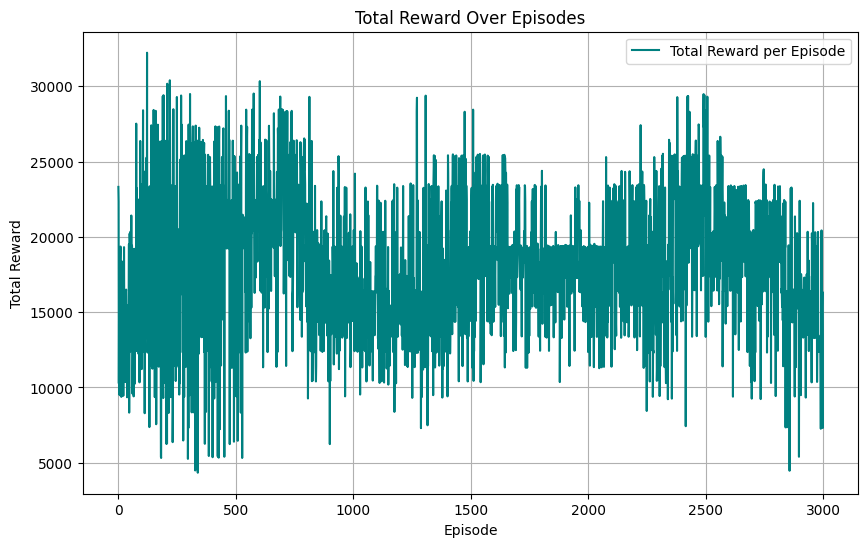

In [80]:
#demand_range = [3, 5]
lambdas = [2, 4]
C = 2
T = 12


num_drones = 2
capacity = 2
x = 2

gamma = 0.5
delta = 0.5

num_episodes = 3000
alpha = 0.001
DF = 0.8
epsilon_start = 1
epsilon_end = 0.05
epsilon_decay = 0.995

charge_penalty_weight = 10
mission_reward_weight = 1000
no_demand_penalty_weight = 1000
revenue_per_level = 5000

batch_size = 32
target_update_frequency = 20

# Train the DQN
q_network, episode_details, buffer = q_learning_dqn(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size)
plot_rewards(episode_details)

In [81]:
episode_details

[{'states': [([(2, 0), (2, 0)], 1),
   ([(2, 2), (2, 2)], 2),
   ([(-2, 1), (-3, 0)], 3),
   ([(-1, 1), (-2, 0)], 4),
   ([(1, 1), (-1, 0)], 5),
   ([(1, 1), (0, 0)], 6),
   ([(2, 2), (0, 0)], 7),
   ([(-2, 1), (0, 0)], 8),
   ([(-1, 1), (0, 0)], 9),
   ([(1, 1), (0, 0)], 10),
   ([(1, 1), (0, 0)], 11),
   ([(2, 2), (1, 1)], 12)],
  'actions': [[0, 0],
   [-1, -2],
   [0, 0],
   [0, 0],
   [0, 0],
   [1, 0],
   [-1, 0],
   [0, 0],
   [0, 0],
   [0, 0],
   [1, 1],
   '-'],
  'rewards': [-120, 7000, -50, -80, -130, -30, 1930, -70, -50, -20, 14940],
  'demands': [{1: 5, 2: 7},
   {1: 2, 2: 2},
   {1: 1, 2: 4},
   {1: 2, 2: 6},
   {1: 5, 2: 8},
   {1: 1, 2: 1},
   {1: 1, 2: 7},
   {1: 3, 2: 4},
   {1: 2, 2: 3},
   {1: 2, 2: 0},
   {1: 2, 2: 2},
   '-']},
 {'states': [([(2, 0), (2, 0)], 1),
   ([(-3, 0), (-3, 0)], 2),
   ([(-2, 0), (-2, 0)], 3),
   ([(-1, 0), (-1, 0)], 4),
   ([(0, 0), (0, 0)], 5),
   ([(0, 0), (1, 1)], 6),
   ([(1, 1), (2, 2)], 7),
   ([(1, 1), (2, 2)], 8),
   ([(1, 1), (-

In [37]:
# DQN
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, hidden_size=64):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, action_size)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.memory = deque(maxlen=capacity)
        
    def push(self, experience):
        self.memory.append(experience)
        
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def __len__(self):
        return len(self.memory)
    
    def print_buffer(self):
        for exp in self.memory:
            print(exp)

def is_terminal_state(state, T):
    # Define the condition for a terminal state
    drones_state, time_index = state
    return time_index >= T  # Allow agent to act at time_index = T

# Main DQN function
def q_learning_dqn(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size):
    # State size: (charge, final_charge) per drone + time index
    state_size = 2 * num_drones + 1
    action_size = len(All_actions_generator(C, num_drones))

    # Initialize the Q-Network and optimizer
    q_network = QNetwork(state_size, action_size)
    optimizer = optim.Adam(q_network.parameters(), lr=alpha)
    criterion = nn.SmoothL1Loss()

    # Initialize the Target Network
    q_target_network = QNetwork(state_size, action_size)
    q_target_network.load_state_dict(q_network.state_dict())
    q_target_network.eval()

    # Initialize replay buffer
    buffer = ReplayBuffer(capacity=100000)

    episode_details = []

    target_update_frequency = 5  # Update target network every 5 episodes

    for episode in range(num_episodes):
        state = initialize_state(num_drones, C)
        episode_data = {
            'states': [],
            'actions': [],
            'rewards': [],
            'demands': [],
        }
        total_reward = 0
        done = False

        epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** episode))

        while True:
            # Record demands
            demands = generate_demand(lambdas)
            episode_data['demands'].append(demands)

            # Choose actions based on epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                # Exploration
                actions = [random.choice(get_feasible_actions(
                    state[0][i][0], C)) for i in range(num_drones)]
            else:
                # Exploitation
                state_tensor = state_to_tensor(state)
                with torch.no_grad():
                    q_values = q_network(state_tensor)

                # Generate all possible feasible action vectors for all drones
                feasible_actions_per_drone = []
                for i in range(num_drones):
                    drone_feasible_actions = get_feasible_actions(
                        state[0][i][0], C)
                    feasible_actions_per_drone.append(drone_feasible_actions)

                # Generate all combinations of feasible actions for all drones
                all_feasible_action_vectors = [list(action_vector) for action_vector in product(*feasible_actions_per_drone)]

                if len(all_feasible_action_vectors) == 0:
                    print("Warning: No feasible actions available for this state.")
                    break  # End the episode if no actions are feasible

                # Convert each feasible action vector to its corresponding index
                feasible_action_indices = []
                action_index_map = {}
                for index, action in All_actions_generator(C, num_drones).items():
                    action_index_map[tuple(action)] = index
                    if action in all_feasible_action_vectors:
                        feasible_action_indices.append(index)

                if len(feasible_action_indices) == 0:
                    print("Warning: No feasible action indices found.")
                    break  # End the episode if no feasible actions are found

                # Filter Q-values to only include those corresponding to feasible actions
                feasible_q_values = q_values[0, feasible_action_indices]

                # Select the best action based on the highest Q-value
                best_feasible_index = feasible_action_indices[torch.argmax(feasible_q_values).item()]
                actions = All_actions_generator(C, num_drones)[best_feasible_index]

            # Record details
            episode_data['states'].append(state)
            episode_data['actions'].append(actions)

            # Transition to the new state
            new_state = state_transition(
                state, actions, T, num_drones, C, x, gamma, delta)
            # Calculate reward for the current state and actions

            if new_state[1] == T:
                done = True
                _, _, reward1 = calculate_demand_summary_and_reward(demands, state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)
                reward2 = TRC(new_state, revenue_per_level)
                reward = (reward1 + reward2)
                total_reward += reward
                episode_data['rewards'].append(reward)
                episode_data['states'].append(new_state)
                episode_data['actions'].append("-")
                episode_data['demands'].append("-")
            else:
                _, _, reward = calculate_demand_summary_and_reward(demands, state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)
                total_reward += reward
                episode_data['rewards'].append(reward)

            # Store the experience in replay buffer, including the done flag
            buffer.push((state, actions, reward, new_state, done))

            # Update the Q-network if the buffer is large enough
            if len(buffer) >= batch_size:
                # Sample a batch of experiences
                batch = buffer.sample(batch_size)

                # Prepare batch data
                states = torch.cat([state_to_tensor(s) for s, _, _, _, _ in batch], dim=0)
                actions = torch.LongTensor([action_to_index(a, All_actions_generator(C, num_drones)) for _, a, _, _, _ in batch]).unsqueeze(1)
                rewards = torch.FloatTensor([r for _, _, r, _, _ in batch]).unsqueeze(1)
                next_states = torch.cat([state_to_tensor(ns) for _, _, _, ns, _ in batch], dim=0)
                dones = torch.FloatTensor([float(done) for _, _, _, _, done in batch]).unsqueeze(1)

                # Compute current Q-values
                current_q_values = q_network(states).gather(1, actions)

                # Compute target Q-values using the target network (Standard DQN)
                with torch.no_grad():
                    next_q_values = q_target_network(next_states).max(1)[0].unsqueeze(1)
                    target_q_values = rewards + DF * next_q_values * (1 - dones)

                # Compute loss
                loss = criterion(current_q_values, target_q_values)

                # Optimize the Q-network
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            state = new_state

            if done:
                break  # End the episode if terminal state is reached

        print(f"Episode {episode + 1}: Total Reward = {total_reward}")
        episode_details.append(episode_data)
        
        # Update the target network periodically
        if (episode + 1) % target_update_frequency == 0:
            q_target_network.load_state_dict(q_network.state_dict())

    print("Replay Buffer Contents:")
    buffer.print_buffer()

    return q_network, episode_details, buffer


In [40]:
#demand_range = [3, 5]
lambdas = [2, 4]
C = 2
T = 6


num_drones = 2
capacity = 3
x = 2

gamma = 0.5
delta = 0.5

num_episodes = 10000
alpha = 0.001
DF = 0.8
epsilon_start = 1
epsilon_end = 0.1
epsilon_decay = 0.999

charge_penalty_weight = 10
mission_reward_weight = 100
no_demand_penalty_weight = 1000
revenue_per_level = 500

batch_size = 128
target_update_frequency = 10

# Train the DQN
q_network, episode_details, buffer = q_learning_dqn(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size)

Episode 1: Total Reward = 6000
Episode 2: Total Reward = 7490
Episode 3: Total Reward = 7490
Episode 4: Total Reward = 6020
Episode 5: Total Reward = 4140
Episode 6: Total Reward = 4500
Episode 7: Total Reward = 6670
Episode 8: Total Reward = 4080
Episode 9: Total Reward = 3670
Episode 10: Total Reward = 4550
Episode 11: Total Reward = 7020
Episode 12: Total Reward = 4510
Episode 13: Total Reward = 8170
Episode 14: Total Reward = 7170
Episode 15: Total Reward = 7110
Episode 16: Total Reward = 2920
Episode 17: Total Reward = 5060
Episode 18: Total Reward = 6080
Episode 19: Total Reward = 8120
Episode 20: Total Reward = 5540
Episode 21: Total Reward = 5660
Episode 22: Total Reward = 1070
Episode 23: Total Reward = 2450
Episode 24: Total Reward = 7010
Episode 25: Total Reward = 7370
Episode 26: Total Reward = 5070
Episode 27: Total Reward = 7090
Episode 28: Total Reward = 7140
Episode 29: Total Reward = 2050
Episode 30: Total Reward = 5150
Episode 31: Total Reward = 6300
Episode 32: Total

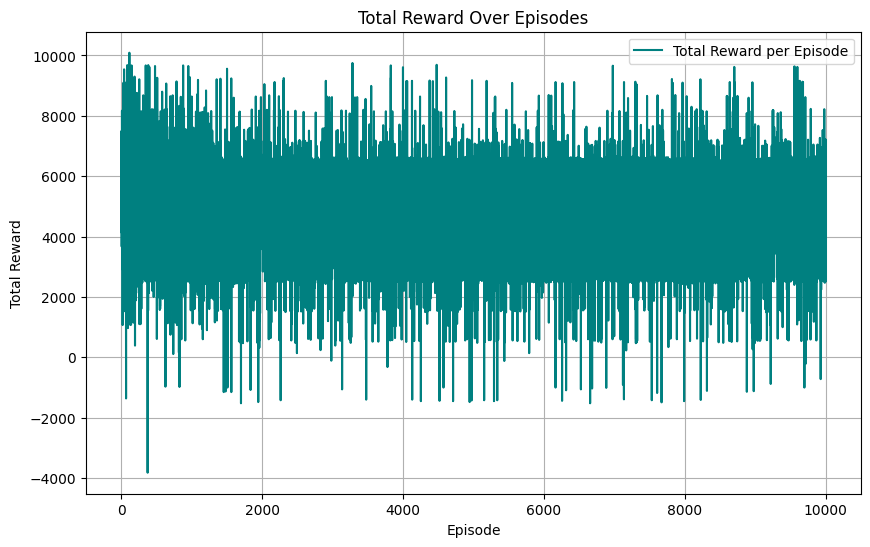

In [41]:
plot_rewards(episode_details)

In [20]:
# #Last considering terminal reward
# import random
# from collections import deque
# from itertools import product
# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Define the Q-Network
# class QNetwork(nn.Module):
#     def __init__(self, state_size, action_size, hidden_size=64):
#         super(QNetwork, self).__init__()
#         self.fc1 = nn.Linear(state_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, action_size)
        
#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# # Define the Replay Buffer
# class ReplayBuffer:
#     def __init__(self, capacity):
#         self.memory = deque(maxlen=capacity)
        
#     def push(self, experience):
#         self.memory.append(experience)
        
#     def sample(self, batch_size):
#         return random.sample(self.memory, batch_size)
    
#     def __len__(self):
#         return len(self.memory)
    
#     def print_buffer(self):
#         for exp in self.memory:
#             print(exp)

# # # State Initialization
# # def initialize_state(num_drones, C, lambdas):
# #     # Initialize the state with drones at maximum charge and initial demands
# #     drones_state = [(C, C) for _ in range(num_drones)]  # (current_charge, final_charge)
# #     demands = {i+1: lambdas[i] for i in range(len(lambdas))}  # Demand classes start from 1
# #     time_index = 0
# #     return (drones_state, demands, time_index)

# # Convert state to tensor
# # def state_to_tensor(state):
# #     drones_state, demands, time_index = state
# #     state_list = []
# #     for drone in drones_state:
# #         state_list.extend(drone)
# #     state_list.extend([demands[i+1] for i in range(len(demands))])
# #     state_list.append(time_index)
# #     state_tensor = torch.FloatTensor(state_list)
# #     return state_tensor.unsqueeze(0)  # Add batch dimension

# # Get feasible actions for a drone
# # def get_feasible_actions(drone_charge, demands, C):
# #     actions = []
# #     if drone_charge < C:
# #         actions.append(1)  # Charging action
# #     for demand_class in demands:
# #         if demands[demand_class] > 0:
# #             actions.append(-demand_class)  # Servicing action
# #     return actions

# # # Generate all possible actions for all drones
# # def All_actions_generator(C, num_drones, demands):
# #     action_space = [1] + [-i for i in demands.keys()]  # 1 for charging, negatives for servicing
# #     actions = {}
# #     action_index = 0
# #     for action_vector in product(action_space, repeat=num_drones):
# #         actions[action_index] = list(action_vector)
# #         action_index += 1
# #     return actions

# # # Convert action to index
# # def action_to_index(action, all_actions):
# #     for index, act in all_actions.items():
# #         if act == action:
# #             return index
# #     raise ValueError("Action not found in all_actions")

# # # State transition function
# # def state_transition(state, actions, num_drones, C, delta):
# #     drones_state, demands, time_index = state
# #     new_drones_state = []
# #     new_demands = demands.copy()
# #     for i in range(num_drones):
# #         current_charge, final_charge = drones_state[i]
# #         action = actions[i]
# #         if action == 1:
# #             # Charging action
# #             new_charge = min(current_charge + delta, C)
# #         elif action < 0:
# #             # Servicing demand
# #             demand_class = -action
# #             if new_demands.get(demand_class, 0) > 0:
# #                 # Assume fulfilling one unit of demand consumes delta charge
# #                 new_demands[demand_class] = max(0, new_demands[demand_class] - 1)
# #                 new_charge = max(0, current_charge - delta)
# #             else:
# #                 new_charge = current_charge
# #         else:
# #             # No action
# #             new_charge = current_charge
# #         new_drones_state.append((new_charge, final_charge))
# #     new_time_index = time_index + 1
# #     return (new_drones_state, new_demands, new_time_index)

# # # Reward function with cumulative demands and terminal rewards
# # def calculate_demand_summary_and_reward(state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight, cumulative_demand_fulfilled, cumulative_demand_unsatisfied, is_terminal=False):
# #     drones_states, demands, _ = state
# #     remaining_demands = demands.copy()

# #     reward = 0
# #     penalty = 0

# #     for i, (charge, final_charge) in enumerate(drones_states):
# #         action = actions[i]
# #         if charge >= 0:
# #             if action == 1:
# #                 # Apply penalty for charging
# #                 penalty += charge_penalty_weight
# #             elif action < 0:
# #                 # Handle demand fulfillment
# #                 demand_class = -action
# #                 if demand_class in remaining_demands and remaining_demands[demand_class] > 0:
# #                     fulfilled = min(capacity, remaining_demands[demand_class])
# #                     remaining_demands[demand_class] -= fulfilled
# #                     cumulative_demand_fulfilled[demand_class] += fulfilled
# #                     reward += mission_reward_weight * fulfilled
# #                 else:
# #                     # Penalty for trying to fulfill zero demand
# #                     penalty += no_demand_penalty_weight

# #     # Check for drones assigned to classes with zero demand
# #     for i, (charge, final_charge) in enumerate(drones_states):
# #         action = actions[i]
# #         if charge >= 0 and action < 0:
# #             demand_class = -action
# #             if demands.get(demand_class, 0) == 0:
# #                 # Apply large penalty for assigning drones to a class with zero demand
# #                 penalty += no_demand_penalty_weight

# #     if is_terminal:
# #         # Calculate total demands unsatisfied
# #         for demand_class in demands:
# #             cumulative_demand_unsatisfied[demand_class] = demands[demand_class] - cumulative_demand_fulfilled.get(demand_class, 0)
# #             # Apply terminal rewards and penalties
# #             reward += 100 * cumulative_demand_fulfilled[demand_class]
# #             penalty += 100 * cumulative_demand_unsatisfied[demand_class]

# #     final_reward = reward - penalty

# #     return cumulative_demand_fulfilled, cumulative_demand_unsatisfied, final_reward

# def is_terminal_state(state, T):
#     # Define the condition for a terminal state
#     drones_state, demands, time_index = state
#     return time_index >= T  # Allow agent to act at time_index = T

# # Main DQN function
# def q_learning_dqn(num_drones, C, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size, delta, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight):
#     # State size: (charge, final_charge) per drone + demands + time index
#     state_size = 2 * num_drones + len(lambdas) + 1
#     # Generate initial demands
#     #initial_demands = {i+1: lambdas[i] for i in range(len(lambdas))}
#     # Action size
#     all_actions = All_actions_generator(C, num_drones)
#     action_size = len(all_actions)

#     # Initialize the Q-Network and optimizer
#     q_network = QNetwork(state_size, action_size)
#     optimizer = optim.Adam(q_network.parameters(), lr=alpha)
#     criterion = nn.MSELoss()

#     # Initialize the Target Network
#     q_target_network = QNetwork(state_size, action_size)
#     q_target_network.load_state_dict(q_network.state_dict())
#     q_target_network.eval()

#     # Initialize replay buffer
#     buffer = ReplayBuffer(capacity=1000000)

#     episode_details = []

#     target_update_frequency = 10  # Update target network every 10 episodes

#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C)
#         episode_data = {
#             'states': [],
#             'actions': [],
#             'rewards': [],
#             'demands': [],
#         }
#         total_reward = 0

#         epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** episode))

#         # Initialize cumulative demands
#         cumulative_demand_fulfilled = {i+1: 0 for i in range(len(lambdas))}
#         cumulative_demand_unsatisfied = {i+1: 0 for i in range(len(lambdas))}

#         while True:
#             # Record demands
#             demands = state[1]
#             episode_data['demands'].append(demands)

#             # Choose actions based on epsilon-greedy policy
#             if random.uniform(0, 1) < epsilon:
#                 # Exploration
#                 actions = []
#                 for i in range(num_drones):
#                     feasible_actions = get_feasible_actions(
#                         state[0][i][0], C)
#                     actions.append(random.choice(feasible_actions))
#             else:
#                 # Exploitation
#                 state_tensor = state_to_tensor(state)
#                 with torch.no_grad():
#                     q_values = q_network(state_tensor)

#                 # Generate all possible feasible action vectors for all drones
#                 feasible_actions_per_drone = []
#                 for i in range(num_drones):
#                     drone_feasible_actions = get_feasible_actions(
#                         state[0][i][0], C)
#                     feasible_actions_per_drone.append(drone_feasible_actions)

#                 # Generate all combinations of feasible actions for all drones
#                 all_feasible_action_vectors = [list(action_vector) for action_vector in product(*feasible_actions_per_drone)]

#                 if len(all_feasible_action_vectors) == 0:
#                     print("Warning: No feasible actions available for this state.")
#                     break  # End the episode if no actions are feasible

#                 # Convert each feasible action vector to its corresponding index
#                 feasible_action_indices = []
#                 action_index_map = {}
#                 for index, action in all_actions.items():
#                     action_index_map[tuple(action)] = index
#                     if action in all_feasible_action_vectors:
#                         feasible_action_indices.append(index)

#                 if len(feasible_action_indices) == 0:
#                     print("Warning: No feasible action indices found.")
#                     break  # End the episode if no feasible actions are found

#                 # Filter Q-values to only include those corresponding to feasible actions
#                 feasible_q_values = q_values[0, feasible_action_indices]

#                 # Select the best action based on the highest Q-value
#                 best_feasible_index = feasible_action_indices[torch.argmax(feasible_q_values).item()]
#                 actions = all_actions[best_feasible_index]

#             # Record details
#             episode_data['states'].append(state)
#             episode_data['actions'].append(actions)

#             # Determine if the new state is terminal
#             done = is_terminal_state(state, T)

#             # Calculate reward for the current state and actions
#             cumulative_demand_fulfilled, cumulative_demand_unsatisfied, reward = calculate_demand_summary_and_reward(
#                 state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight, cumulative_demand_fulfilled, cumulative_demand_unsatisfied, is_terminal=done)
#             total_reward += reward
#             episode_data['rewards'].append(reward)

#             # Transition to the new state
#             new_state = state_transition(
#                 state, actions, T, num_drones, C, x, gamma=0.9, delta=0.1  # Adjust gamma and delta as needed
#             )

#             # Store the experience in replay buffer, including the done flag
#             buffer.push((state, actions, reward, new_state, done))

#             # Update the Q-network if the buffer is large enough
#             if len(buffer) >= batch_size:
#                 # Sample a batch of experiences
#                 batch = buffer.sample(batch_size)
                
#                 # Prepare batch data
#                 states = torch.cat([state_to_tensor(s) for s, _, _, _, _ in batch], dim=0)
#                 actions_batch = torch.LongTensor([action_to_index(a, all_actions) for _, a, _, _, _ in batch]).unsqueeze(1)
#                 rewards_batch = torch.FloatTensor([r for _, _, r, _, _ in batch]).unsqueeze(1)
#                 next_states = torch.cat([state_to_tensor(ns) for _, _, _, ns, _ in batch], dim=0)
#                 dones_batch = torch.FloatTensor([float(done) for _, _, _, _, done in batch]).unsqueeze(1)
                
#                 # Compute current Q-values
#                 current_q_values = q_network(states).gather(1, actions_batch)
                
#                 # Compute target Q-values using the target network
#                 with torch.no_grad():
#                     next_q_values = q_target_network(next_states).max(1)[0].unsqueeze(1)
#                     target_q_values = rewards_batch + DF * next_q_values * (1 - dones_batch)
                
#                 # Compute loss
#                 loss = criterion(current_q_values, target_q_values)
                
#                 # Optimize the Q-network
#                 optimizer.zero_grad()
#                 loss.backward()
#                 optimizer.step()

#             if done:
#                 break  # End the episode if terminal state is reached

#             state = new_state

#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")
#         episode_details.append(episode_data)
        
#         # Update the target network periodically
#         if (episode + 1) % target_update_frequency == 0:
#             q_target_network.load_state_dict(q_network.state_dict())

#     return q_network, episode_details, buffer


In [21]:
# #demand_range = [3, 5]
# lambdas = [3, 3]
# C = 2
# T = 6


# num_drones = 4
# capacity = 2
# x = 2

# gamma = 0.5
# delta = 0.5

# num_episodes = 10000
# alpha = 0.5
# DF = 0.5
# epsilon_start = 1
# epsilon_end = 0.2
# epsilon_decay = 0.99

# charge_penalty_weight = 10
# mission_reward_weight = 10000
# no_demand_penalty_weight = 1000

# batch_size = 32

# # Train the DQN
# q_network, episode_details, buffer = q_learning_dqn(num_drones, C, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size, delta, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)

In [22]:
# plot_rewards(episode_details)

In [23]:
# #Reward Analysis
# def calculate_demand_summary_and_reward(demands, states, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight):
#     drones_states, _ = states
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}
#     remaining_demands = demands.copy()

#     reward = 0
#     penalty = 0

#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0:
#             if action > 0:
#                 # Apply penalty for increasing charge
#                 penalty += charge_penalty_weight * action
#             elif action < 0:
#                 # Handle demand fulfillment
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     reward += mission_reward_weight * demand_class

#     # Check for drones assigned to classes with zero demand
#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0 and action < 0:
#             demand_class = -action
#             if demands[demand_class] == 0:
#                 # Apply large penalty for assigning drones to a class with zero demand
#                 penalty += no_demand_penalty_weight

#     for demand_class in demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
#         reward += 100 * demand_fulfilled[demand_class]
#         penalty += 1000 * demand_unsatisfied[demand_class]

#     final_reward = reward - penalty

#     return demand_fulfilled, demand_unsatisfied, final_reward







# state = ([(4, 0), (4, 0)], 2)
# demands = {1: 3, 2: 7}
# actions = [-1, -2]
# capacity = 0
# charge_penalty_weight = 1
# mission_reward_weight = 2
# no_demand_penalty_weight = 1000000
# calculate_demand_summary_and_reward(demands,
#                 state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)


In [24]:
# import numpy as np
# import random
# from sklearn.linear_model import LinearRegression
# from itertools import product

# def q_learning_regression(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size):
#     # Initialize regression model
#     regression_model = LinearRegression()

#     # To hold episode data
#     episode_details = []

#     # To store experiences for regression training
#     experience_data = []
#     experience_rewards = []

#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C)
#         episode_data = {
#             'states': [],
#             'actions': [],
#             'rewards': [],
#             'demands': [],
#         }
#         total_reward = 0

#         epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** episode))

#         while True:
#             # Generate demand for the current time period and update state
#             episode_data['demands'].append(state[1])

#             # Choose actions based on epsilon-greedy policy
#             if random.uniform(0, 1) < epsilon:
#                 # Exploration
#                 actions = [random.choice(get_feasible_actions(state[0][i][0], C)) for i in range(num_drones)]
#             else:
#                 # Exploitation
#                 # Flatten the state for regression model input
#                 state_tensor = np.concatenate([np.array([charge, final_charge]) for charge, final_charge in state[0]] + [np.array(state[1])]).reshape(1, -1)  # Flattened state
#                 if len(experience_data) > 0:
#                     q_values = regression_model.predict(state_tensor).flatten()  # Get Q-values from regression model
#                 else:
#                     q_values = np.zeros(len(All_actions_generator(C, num_drones)))  # Initialize Q-values if no experience

#                 # Generate all possible feasible action vectors for all drones
#                 feasible_actions_per_drone = []
#                 for i in range(num_drones):
#                     drone_feasible_actions = get_feasible_actions(state[0][i][0], C)
#                     feasible_actions_per_drone.append(drone_feasible_actions)

#                 # Generate all combinations of feasible actions for all drones
#                 all_feasible_action_vectors = [list(action_vector) for action_vector in product(*feasible_actions_per_drone)]

#                 # Convert feasible action vectors to indices for filtering
#                 feasible_action_indices = []
#                 for index, action in All_actions_generator(C, num_drones).items():
#                     if action in all_feasible_action_vectors:
#                         feasible_action_indices.append(index)

#                 # Select the best action based on the highest Q-value
#                 if len(feasible_action_indices) > 0:
#                     feasible_q_values = q_values[feasible_action_indices]
#                     best_feasible_index = feasible_action_indices[torch.argmax(feasible_q_values).item()]
#                     actions = All_actions_generator(C, num_drones)[best_feasible_index]
#                 else:
#                     print("Warning: No feasible actions available for this state.")
#                     continue  # Skip this iteration

#             # Record details
#             episode_data['states'].append(state)
#             episode_data['actions'].append(actions)

#             # Transition to the new state
#             new_state = state_transition(state, actions, T, num_drones, C, x, gamma, delta)

#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(state, actions, capacity, charge_penalty_weight, mission_reward_weight, no_demand_penalty_weight)
#             total_reward += reward
#             episode_data['rewards'].append(reward)

#             # Store the experience for training
#             # Check dimensions before concatenation
#             state_charge_final_charge = [np.array([charge, final_charge]) for charge, final_charge in state[0]]
#             state_demand = np.array(state[1])  # Assuming state[1] is a list of demands

#             print(f"State Charge/Final Charge shapes: {[arr.shape for arr in state_charge_final_charge]}")
#             print(f"State Demand shape: {state_demand.shape}")

#             try:
#                 experience_state = np.concatenate(state_charge_final_charge + [state_demand])
#                 print(f"Experience state shape: {experience_state.shape}")
#                 experience_data.append(experience_state.reshape(1, -1))  # Reshape for regression
#             except ValueError as e:
#                 print(f"Error concatenating experience state: {e}")
#                 break  # Break to avoid crashing in the loop

#             experience_rewards.append(reward)

#             # Train regression model if we have enough experience
#             if len(experience_data) >= batch_size:
#                 X_train = np.vstack(experience_data)
#                 y_train = np.array(experience_rewards)
#                 regression_model.fit(X_train, y_train)  # Fit the regression model

#             state = new_state

#             if state[2] == 1:  # End of episode if time index is back to 1
#                 break

#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")
#         episode_details.append(episode_data)

#     return regression_model, episode_details

# # Example usage:
# # num_drones = ...
# # C = ...
# # x = ...
# # T = ...
# # lambdas = ...
# # alpha = ...
# # DF = ...
# # epsilon_start = ...
# # epsilon_end = ...
# # epsilon_decay = ...
# # num_episodes = ...
# # capacity = ...
# # batch_size = ...

# # regression_model, episode_details = q_learning_regression(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size)


In [25]:
# #demand_range = [3, 5]
# lambdas = [2, 3]
# C = 2
# T = 6


# num_drones = 2
# capacity = 5
# x = 3

# gamma = 0.5
# delta = 0.5

# num_episodes = 200
# alpha = 0.5
# DF = 0.9
# epsilon_start = 1
# epsilon_end = 0.01
# epsilon_decay = 0.995

# charge_penalty_weight = 10
# mission_reward_weight = 200
# no_demand_penalty_weight = 100

# batch_size = 64

# # Train the DQN
# regression_model, episode_details = q_learning_regression(num_drones, C, x, T, lambdas, alpha, DF, epsilon_start, epsilon_end, epsilon_decay, num_episodes, capacity, batch_size)

In [26]:
# plot_rewards(episode_details)

In [27]:
# # For example, to get weights from the first linear layer
# print(q_network.fc1.weight.data)

In [28]:
# #Debug sth
# all_possible_actions = {
#     0: [-1, 0, 0, -2],
#     1: [1, 0, 0, 0],
#     2: [0, 0, 0, 0],
#     3: [1, 1, 1, 1],
#     4: [1, 0, 1, 0],
#     5: [2, 2, 2, 2]
# }

# all_feasible_actions = [[1, 1, 1, 1],
#                         [-1, 0, 0, -2], [1, 0, 1, 0], [2, 2, 2, 2]]

# # Get the Q-values for all possible actions (output of your Q-network)
# q_values = torch.tensor([0.5, 0.8, 0.3, 0.04, 1, 2.5])  # Example Q-values

# # Step 1: Find the indices of feasible actions in the full action set
# feasible_indices = [index for index, action in all_possible_actions.items(
# ) if action in all_feasible_actions]

# # Step 2: Filter the Q-values to only include those corresponding to feasible actions
# feasible_q_values = q_values[feasible_indices]

# # Step 3: Find the index of the maximum Q-value within the feasible actions
# best_feasible_index = feasible_indices[torch.argmax(feasible_q_values).item()]

# # Step 4: Retrieve the best action from the feasible set
# best_action = all_possible_actions[best_feasible_index]

# print(feasible_indices)
# print(f"The best feasible action is: {best_action}")
# print(
#     f"The corresponding index in all possible actions is: {best_feasible_index}")

In [27]:
#action_to_index_dict = {tuple(action): idx for idx, action in enumerate(All_actions)}

In [32]:
# # Step 1: Create a mapping dictionary
# def create_action_id_to_index_mapping(num_drones, C):
#     """
#     Creates a mapping from action IDs to their corresponding indices in the Q-values tensor.
    
#     Args:
#         num_drones (int): Number of drones.
#         C (int): Capacity or maximum value for the action.
    
#     Returns:
#         dict: A dictionary where keys are action IDs and values are indices in the Q-values tensor.
#     """
#     mapping = {}
#     num_actions_per_drone = C + 2  # Number of possible actions per drone
#     action_id = 0
    
#     # Generate all possible actions and map them to indices
#     for action_tuple in product(range(-C, C + 1), repeat=num_drones):
#         action_index = action_to_index(action_tuple, C)
#         mapping[action_id] = action_index
#         action_id += 1
    
#     return mapping

# # Example usage of create_action_id_to_index_mapping
# num_drones = 3
# C = 5
# action_id_to_index_dict = create_action_id_to_index_mapping(num_drones, C)


In [137]:
# i = 0
# while True:
#     i = i + 1
#     actions = [random.choice(get_feasible_actions(
#                     [(0, 0), (0, 0), (0, 0), (0, 0), 1][i][0], 5)) for i in range(4)]
#     if actions == [1,1,1,1]:
#         print(i)
#         break

In [138]:
# a = initialize_state(4, 3)

# state_tensor = state_to_tensor(a)

In [170]:
# states = [[(0, 0), (6, 0), (6, 0), (6, 0)], 1]  # Updated states after actions
# #actions = [-3, -2, -2, 1]  # Corresponding actions: charge drone 1, assign drone 2 to class 2, assign drone 3 to class 2, no action for drone 4
# #demands = {1: 4, 2: 3, 3: 4}  # Initial demands
# #capacity = 2  # Drone capacity

In [171]:
# def get_feasible_actions(charge, C):
#     feasible_actions = [0]
#     if charge >= 0:
#         if charge < C:
#             feasible_actions.append(1)
#         for j in range(1, charge + 1):
#             feasible_actions.append(-j)
#     return feasible_actions

In [172]:
# initialize_state(4, 5)

In [173]:
# state_transition(initialize_state(4, 5), [0,-1,-2, 0], 12, 4, 5, 2, gamma, delta)

In [174]:
# get_feasible_actions(states[0][2][0], C)

In [193]:
# def initialize_q_table(num_drones, C, x, T):
#     state_size_per_drone = (C + 1) * (x + 1) * T
#     total_states = state_size_per_drone ** num_drones
#     action_size_per_drone = 2 * C + 1
#     total_actions = action_size_per_drone ** num_drones
#     Q_table = np.zeros((total_states, total_actions))
#     return Q_table

# def initialize_state(num_drones, C, x, T):
#     drones_states = [(C, 0) for _ in range(num_drones)]
#     time_index = 1
#     state = (drones_states, time_index)
#     return state

# def state_transition(states, actions, num_drones, C, x, gamma, delta):
#     drones_states, time_index = states
#     new_drones_states = []
    
#     for i in range(num_drones):
#         charge, final_charge = drones_states[i]
#         action = actions[i]

#         if charge >= 0 and action >= 0:
#             new_charge = min(charge + action, C)
#         elif charge >= 0 and action < 0:
#             new_charge = -math.ceil((C / charge) * (1 + gamma * np.power(
#                 (C - charge) / C, delta)) * ((x + 1) * (abs(action)) / C))
#         elif charge < 0 and charge != -1:
#             new_charge = charge + 1
#         else:
#             new_charge = final_charge
        
#         if charge >= 0 and action > 0:
#             final_charge = new_charge
#         elif charge >= 0 and action < 0:
#             final_charge = charge + action
#         elif charge >= 0 and action == 0:
#             final_charge = charge
#         elif charge < 0 and action == 0:
#             final_charge = final_charge
        
#         new_drones_states.append((new_charge, final_charge))
    
#     new_time_index = (time_index % T) + 1
#     new_state = (new_drones_states, new_time_index)
    
#     return new_state

# def get_feasible_actions(charge, C):
#     feasible_actions = [0]
#     if charge >= 0:
#         if charge < C:
#             feasible_actions.append(1)
#         for j in range(1, charge + 1):
#             feasible_actions.append(-j)
#     return feasible_actions

# def generate_demand(lambdas):
#     return {i + 1: np.random.poisson(lambdas[i]) for i in range(len(lambdas))}

# def calculate_demand_summary_and_reward(demands, states, actions, capacity, charge_penalty_weight=1, mission_reward_weight=1):
#     drones_states, _ = states
#     demand_fulfilled = {i: 0 for i in demands}
#     demand_unsatisfied = {i: 0 for i in demands}
#     remaining_demands = demands.copy()
    
#     reward = 0
#     penalty = 0
    
#     for i, (charge, final_charge) in enumerate(drones_states):
#         action = actions[i]
#         if charge >= 0:
#             if action > 0:
#                 penalty += charge_penalty_weight * action
#             elif action < 0:
#                 demand_class = -action
#                 if demand_class in remaining_demands:
#                     fulfilled = min(capacity, remaining_demands[demand_class])
#                     remaining_demands[demand_class] -= fulfilled
#                     demand_fulfilled[demand_class] += fulfilled
#                     reward += mission_reward_weight * demand_class

#     for demand_class in demands:
#         demand_unsatisfied[demand_class] = demands[demand_class] - demand_fulfilled[demand_class]
#         reward += demand_class * demand_fulfilled[demand_class]
#         penalty += demand_class * demand_unsatisfied[demand_class]
    
#     final_reward = reward - penalty
    
#     return demand_fulfilled, demand_unsatisfied, final_reward

# def q_learning(num_drones, C, x, T, lambdas, alpha=0.1, gamma=0.9, epsilon=0.1, num_episodes=1000, delta=0.1, capacity=3, save_interval=100):
#     Q_table = initialize_q_table(num_drones, C, x, T)
    
#     episode_details = []  # List to store details of each episode
#     q_table_snapshots = []  # List to store Q-table snapshots
    
#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C, x, T)
#         episode_data = {
#             'states': [],
#             'actions': [],
#             'rewards': [],
#             'new_states': []
#         }
#         total_reward = 0
        
#         while True:
#             # Generate demand for the current time period
#             demands = generate_demand(lambdas)
            
#             # Choose actions based on epsilon-greedy policy
#             actions = []
#             for i in range(num_drones):
#                 charge, _ = state[0][i]
#                 feasible_actions = get_feasible_actions(charge, C)
                
#                 if random.uniform(0, 1) < epsilon:
#                     # Exploration: Choose a random action
#                     action = random.choice(feasible_actions)
#                 else:
#                     # Exploitation: Choose the best action based on Q-table
#                     best_action = None
#                     best_q_value = -float('inf')
#                     for action in feasible_actions:
#                         action_index = action_to_index([action], num_drones, 2 * C + 1)
#                         q_value = Q_table[state_to_index(state, num_drones, C, x, T), action_index]
#                         if q_value > best_q_value:
#                             best_q_value = q_value
#                             best_action = action
#                     action = best_action
                
#                 actions.append(action)
            
#             # Record details
#             episode_data['states'].append(state)
#             episode_data['actions'].append(actions)
            
#             # Transition to the new state
#             new_state = state_transition(state, actions, num_drones, C, x, gamma, delta)
#             episode_data['new_states'].append(new_state)
            
#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(demands, state, actions, capacity)
#             total_reward += reward
#             episode_data['rewards'].append(reward)
            
#             # Update Q-table
#             state_index = state_to_index(state, num_drones, C, x, T)
#             new_state_index = state_to_index(new_state, num_drones, C, x, T)
#             action_index = action_to_index(actions, num_drones, 2 * C + 1)
            
#             best_future_q = np.max(Q_table[new_state_index])
#             Q_table[state_index, action_index] += alpha * (reward + gamma * best_future_q - Q_table[state_index, action_index])
            
#             state = new_state
            
#             if state[1] == 1:  # End of episode if time index is back to 1
#                 break
        
#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")
#         episode_details.append(episode_data)
        
#         # Save Q-table snapshot
#         if (episode + 1) % save_interval == 0:
#             q_table_snapshots.append(np.copy(Q_table))
    
#     return Q_table, episode_details, q_table_snapshots

# # Helper functions to convert state and action to indices
# def state_to_index(state, num_drones, C, x, T):
#     drones_states, time_index = state
#     state_index = 0
#     multiplier = 1
    
#     for (charge, _) in drones_states:
#         state_index += (charge + C) * multiplier
#         multiplier *= (C + 1 + x)
    
#     state_index += (time_index - 1) * multiplier
#     return state_index

# def action_to_index(actions, num_drones, num_actions):
#     action_index = 0
#     multiplier = 1
    
#     for action in actions:
#         action_index += (action + num_actions // 2) * multiplier
#         multiplier *= num_actions
    
#     return action_index

# # Example usage
# num_drones = 2
# C = 3
# x = 2
# T = 12
# lambdas = [5, 3, 2]  # Example lambda values for demand generation

# alpha = 0.1
# gamma = 0.9
# epsilon = 0.1
# num_episodes = 1000
# save_interval = 500  # Save Q-table snapshots every 500 episodes

# # Train the Q-learning algorithm
# Q_table, episode_details, q_table_snapshots = q_learning(num_drones, C, x, T, lambdas, alpha, gamma, epsilon, num_episodes, save_interval=save_interval)

# # Plot Q-table updates
# # def plot_q_table_snapshots(q_table_snapshots, num_drones, C, x, T):
# #     for idx, snapshot in enumerate(q_table_snapshots):
# #         plt.figure(figsize=(10, 6))
# #         plt.title(f"Q-table Snapshot at Episode {idx * save_interval + save_interval}")
# #         plt.imshow(snapshot, cmap='viridis', interpolation='nearest')
# #         plt.colorbar()
# #         plt.show()

# # plot_q_table_snapshots(q_table_snapshots, num_drones, C, x, T)


In [26]:
# def q_learning(num_drones, C, x, T, lambdas, alpha=0.1, gamma=0.9, epsilon=0.1, num_episodes=1000, delta=0.1, capacity=3):
#     Q_table = initialize_q_table(num_drones, C, x, T)
    
#     for episode in range(num_episodes):
#         state = initialize_state(num_drones, C, x, T)
#         total_reward = 0
        
#         while True:
#             # Generate demand for the current time period
#             demands = generate_demand(lambdas)
            
#             # Choose actions based on epsilon-greedy policy
#             actions = []
#             for i in range(num_drones):
#                 charge, _ = state[0][i]
#                 feasible_actions = get_feasible_actions(charge, C)
                
#                 if random.uniform(0, 1) < epsilon:
#                     # Exploration: Choose a random action
#                     action = random.choice(feasible_actions)
#                 else:
#                     # Exploitation: Choose the best action based on Q-table
#                     best_action = None
#                     best_q_value = -float('inf')
#                     for action in feasible_actions:
#                         action_index = action_to_index([action], num_drones, 2 * C + 1)
#                         q_value = Q_table[state_to_index(state, num_drones, C, x, T), action_index]
#                         if q_value > best_q_value:
#                             best_q_value = q_value
#                             best_action = action
#                     action = best_action
                
#                 actions.append(action)
            
#             # Transition to the new state
#             new_state = state_transition(state, actions, num_drones, C, x, gamma, delta)
            
#             # Calculate reward for the current state and actions
#             _, _, reward = calculate_demand_summary_and_reward(demands, state, actions, capacity)
#             total_reward += reward
            
#             # Update Q-table
#             state_index = state_to_index(state, num_drones, C, x, T)
#             new_state_index = state_to_index(new_state, num_drones, C, x, T)
#             action_index = action_to_index(actions, num_drones, 2 * C + 1)
            
#             best_future_q = np.max(Q_table[new_state_index])
#             old_q_value = Q_table[state_index, action_index]
#             Q_table[state_index, action_index] += alpha * (reward + gamma * best_future_q - old_q_value)
            
#             print(f"Episode {episode + 1}: State Index = {state_index}, Action Index = {action_index}, Old Q = {old_q_value}, New Q = {Q_table[state_index, action_index]}")
            
#             state = new_state
            
#             if state[1] == 1:  # End of episode if time index is back to 1
#                 break
        
#         print(f"Episode {episode + 1}: Total Reward = {total_reward}")

#     return Q_table


# q_learning(num_drones, C, x, T, lambdas, alpha=0.1, gamma=0.9, epsilon=0.1, num_episodes=1000, delta=0.1, capacity=3)
